<a href="https://colab.research.google.com/github/itsumiii/itsumiii/blob/main/ItsumiNagakura_DASMA51_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

week 14 can be important

pre-processing: TWITTER SENTIMENT ANALYSIS FOR BEGINNERS https://www.kaggle.com/stoicstatic/twitter-sentiment-analysis-for-beginners 

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
# importing dependencies

#pandas
import pandas as pd

#youtube scraping #taken from class notebook
!pip install selenium
#we also need to do the extra steps below because we need to call the chrome executable from colab
#these steps are not necessary if you are running the code from your own computer
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
from selenium import webdriver

import time
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#demoji
!pip install demoji
import demoji
demoji.download_codes()

#language detectors
!pip install langdetect
from textblob import TextBlob
from langdetect import detect

#preprocess

import nltk, re, pprint
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

#vader sentiment analysis
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#make rader chart
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

from sklearn.model_selection import train_test_split

#naive bayes
from sklearn.naive_bayes import MultinomialNB

#logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

#Twitter scraping

!pip install tweepy
!pip install unidecode
import tweepy
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json #file format, can covert to data frame
from unidecode import unidecode
import time
import datetime
from tqdm import tqdm
import numpy as np


  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.8
    Uninstalling urllib3-1.26.8:
      Successfully uninstalled urllib3-1.26.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [91]:
#import data

df = pd.read_csv("/content/gdrive/MyDrive/python files/charts.csv")

#change format of date column to easily look up data of specific months
df['date']= pd.to_datetime(df['date'])

#to make sure the dates are in order so its easier to find last available data for each month
df.sort_values(by = 'date', ascending = False)

df.head()


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [ ]:
list(df.columns)

['date', 'rank', 'song', 'artist', 'last-week', 'peak-rank', 'weeks-on-board']

# November 2020

In [ ]:
#see what is the last day of month with available data
df.loc[(df['date'].dt.month==11)&(df['date'].dt.year==2020)]
#2020-11-28

#get first and last rows of df which only includes data from the date found above
Nov = df.loc[(df.date == '2020-11-28')].iloc[[0,-2,-1]]

Nov

#1 #Mood by 24kGoldn featuring Iann Dior
#https://youtu.be/GrAchTdepsU

#100 - no music video

#99 #Practice by DaBaby
#https://youtu.be/1YzXZN37stw


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
4900,2020-11-28,1,Mood,24kGoldn Featuring iann dior,1.0,1,15
4998,2020-11-28,99,Practice,DaBaby,88.0,86,4
4999,2020-11-28,100,Bought A Bad Bitch,Future & Lil Uzi Vert,NaN,100,1


##11_1

###youtube

In [ ]:
#scraping

#1 #Mood by 24kGoldn featuring Iann Dior
#https://youtu.be/GrAchTdepsU


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Mood =[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/GrAchTdepsU") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Mood.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

use options instead of chrome_options



In [ ]:
Mood_= pd.DataFrame(Mood, columns=['comment'])

#export dataframe as csv to my google drive bc the scraping process takes up too much time and space to run everytime
Mood_.to_csv('/content/gdrive/My Drive/python files/final project/Nov1.csv', encoding='utf-8', index=False)

In [49]:
#!!name all data of top song of each month as 'songname_1' !!!!!!
Nov_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/Nov1.csv")

Nov_1.info()
Nov_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2600 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n3:58\nWiz Khalifa - ...
1,"Official video for ""Mood"" by 24kGoldn featurin..."
2,This songs a vibe! 🔥
3,Nossa que som não paro de ouvir concerteza 😍🇧🇷🇧🇷
4,This song never gets old. No matter much I lis...


In [50]:
#drop duplicates and null values
Nov_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Nov_1.dropna

Nov_1.head()

,comment
0,SKIP NAVIGATION\nSIGN IN\n3:58\nWiz Khalifa - ...
1,"Official video for ""Mood"" by 24kGoldn featurin..."
3,Nossa que som não paro de ouvir concerteza 😍🇧🇷🇧🇷
5,"Why you always in a mood?\n\nFuckin' 'round, a..."
6,A song with lots of vibes. This hits hard fore...


In [51]:
#drop first few rows bc they are part of the music video description not comments
#reset index

Nov_1= Nov_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Nov_1['comment'] = Nov_1['comment'].str.lower()

Nov_1.head()

,comment
0,nossa que som não paro de ouvir concerteza 😍🇧🇷🇧🇷
1,"why you always in a mood?\n\nfuckin' 'round, a..."
2,a song with lots of vibes. this hits hard fore...
3,this such a vibe 🪐🌙
4,this song never gets old. no matter how much i...


In [52]:
#clear emojis
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def preprocess(data):
    noemo = []

    for comment in data:

        # Replace all emojis.
        for emoji in emojis.keys():
            comment = comment.replace(emoji, "EMOJI" + emojis[emoji])        
            
        noemo.append(comment)
        
    return noemo

Nov_1['clean'] = preprocess(Nov_1['comment'])

#clean ios emojis
Nov_1['clean'] = [demoji.replace(x,"") for x in Nov_1.clean]

Nov_1.head()

,comment,clean
0,nossa que som não paro de ouvir concerteza 😍🇧🇷🇧🇷,nossa que som não paro de ouvir concerteza
1,"why you always in a mood?\n\nfuckin' 'round, a...","why you always in a mood?\n\nfuckin' 'round, a..."
2,a song with lots of vibes. this hits hard fore...,a song with lots of vibes. this hits hard fore...
3,this such a vibe 🪐🌙,this such a vibe
4,this song never gets old. no matter how much i...,this song never gets old. no matter how much i...


In [53]:
#clean languages other than english and add to dataset

Nov_1['language'] = 0

count = 0
for i in range(0,len(Nov_1)):

  temp = Nov_1['clean'].iloc[i]
  count += 1
  try:
    Nov_1['language'].iloc[i] = detect(temp)
  except:
    Nov_1['language'].iloc[i] = "error"

#detect and extract only english comments
Nov_1[Nov_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1687
Name: language, dtype: int64

In [54]:
#create new dataframe with just clean english comments

Nov_1 = Nov_1[Nov_1['language']=='en'].reset_index(drop=True)

N1_clean = pd.DataFrame(Nov_1, columns = ['clean'])

N1_clean.head()

,clean
0,"why you always in a mood?\n\nfuckin' 'round, a..."
1,a song with lots of vibes. this hits hard fore...
2,this such a vibe
3,this song never gets old. no matter how much i...
4,the only problem with this song is:


In [55]:
#make sure that only english comments are left and data length matches

N1_clean.count()

clean    1687
dtype: int64

In [56]:
#tokenize, remove stopwords and lemmatize

wnl = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['-',' +', '^', '.', ':',',','"','!',"’","'","[","]","?"]) #remove special characters and most common words that don

def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [wnl.lemmatize(w) for w in word_tokens if not w in stopwords]
    return " ".join(filtered_sentence)

N1_clean['nostop'] = [remove_stopwords(x) for x in N1_clean.clean]

N1_clean.head()

,clean,nostop
0,"why you always in a mood?\n\nfuckin' 'round, a...",always mood fuckin 'round actin brand new ai n...
1,a song with lots of vibes. this hits hard fore...,song lot vibe hit hard forever love
2,this such a vibe,vibe
3,this song never gets old. no matter how much i...,song never get old matter much listen
4,the only problem with this song is:,problem song


In [57]:
#find polarity

analyzer = SentimentIntensityAnalyzer()

N1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in N1_clean.nostop]

In [58]:
N1_clean.head()

,clean,nostop,polarity
0,"why you always in a mood?\n\nfuckin' 'round, a...",always mood fuckin 'round actin brand new ai n...,0.5719
1,a song with lots of vibes. this hits hard fore...,song lot vibe hit hard forever love,0.5859
2,this such a vibe,vibe,0.0000
3,this song never gets old. no matter how much i...,song never get old matter much listen,-0.0191
4,the only problem with this song is:,problem song,-0.4019


In [59]:
N1_clean['sentiment'] = 0

N1_clean['sentiment'][N1_clean.polarity > 0] = "Positive"
N1_clean['sentiment'][N1_clean.polarity == 0] = "Neutral"
N1_clean['sentiment'][N1_clean.polarity < 0] = "Negative"
N1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,clean,nostop,polarity,sentiment
0,"why you always in a mood?\n\nfuckin' 'round, a...",always mood fuckin 'round actin brand new ai n...,0.5719,Positive
1,a song with lots of vibes. this hits hard fore...,song lot vibe hit hard forever love,0.5859,Positive
2,this such a vibe,vibe,0.0000,Neutral
3,this song never gets old. no matter how much i...,song never get old matter much listen,-0.0191,Negative
4,the only problem with this song is:,problem song,-0.4019,Negative


In [60]:
N1_clean.sentiment.value_counts()

Positive    926
Neutral     574
Negative    187
Name: sentiment, dtype: int64

In [61]:
N1_clean.count()

clean        1687
nostop       1687
polarity     1687
sentiment    1687
dtype: int64

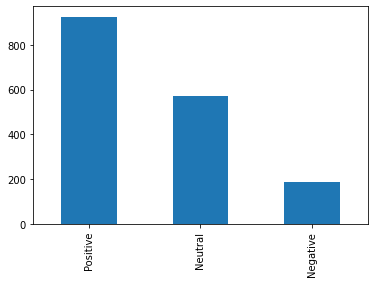

In [62]:
#see the balance between pos/neg

N1_clean['sentiment'].value_counts().plot.bar()

#too unbalanced

In [63]:
N1_clean['sentiment'].value_counts()

Positive    926
Neutral     574
Negative    187
Name: sentiment, dtype: int64

In [64]:
#try emolex

with open("/content/gdrive/MyDrive/python files/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt","r") as f:
  lexicontext = f.readlines()
wordline = []
for line in lexicontext:
  wordline.append(line.split("\t"))

In [65]:
#creating database for all emotions

anger = {}
for entry in wordline:
  if entry[1] == "anger":
    if int(entry[2][0]) > 0:
      anger[entry[0]] = 1

anticipation = {}
for entry in wordline:
  if entry[1] == "anticipation":
    if int(entry[2][0]) > 0:
      anticipation[entry[0]] = 1

disgust = {}
for entry in wordline:
  if entry[1] == "disgust":
    if int(entry[2][0]) > 0:
      disgust[entry[0]] = 1

fear = {}
for entry in wordline:
  if entry[1] == "fear":
    if int(entry[2][0]) > 0:
      fear[entry[0]] = 1

joy = {}
for entry in wordline:
  if entry[1] == "joy":
    if int(entry[2][0]) > 0:
      joy[entry[0]] = 1

negative = {}
for entry in wordline:
  if entry[1] == "negative":
    if int(entry[2][0]) > 0:
      negative[entry[0]] = 1

positive = {}
for entry in wordline:
  if entry[1] == "positive":
    if int(entry[2][0]) > 0:
      positive[entry[0]] = 1

sadness = {}
for entry in wordline:
  if entry[1] == "sadness":
    if int(entry[2][0]) > 0:
      sadness[entry[0]] = 1

surprise = {}
for entry in wordline:
  if entry[1] == "surprise":
    if int(entry[2][0]) > 0:
      surprise[entry[0]] = 1

trust = {}
for entry in wordline:
  if entry[1] == "trust":
    if int(entry[2][0]) > 0:
      trust[entry[0]] = 1


In [66]:
t = N1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
N1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

In [67]:
N1_score_transposed = N1_score.T 
N1_score_transposed

Emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
Score,4,6,2,11,8,6,10,2,5,4


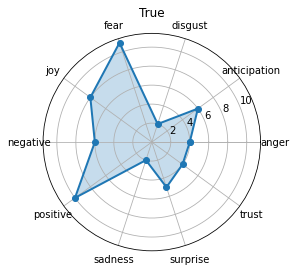

In [68]:
#make rader chart

labels=np.array(emotion)
stats=N1_score_transposed.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(N1_score_transposed.iloc[0].all())
ax.grid(True)

In [69]:
X = N1_clean.nostop
y = N1_clean.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

#bow
tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+')

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

In [70]:
#naive bayes

NB = MultinomialNB()
NB.fit(tf_train,y_train)

NB.score(tf_train,y_train)

0.895324494068388

In [71]:
expected_NB = y_test
predicted_NB = NB.predict(tf_test)

from sklearn import metrics
print(metrics.classification_report(expected_NB, predicted_NB))

              precision    recall  f1-score   support

    Negative       0.88      0.23      0.37        30
     Neutral       0.79      0.64      0.71        77
    Positive       0.73      0.92      0.82       147

    accuracy                           0.75       254
   macro avg       0.80      0.60      0.63       254
weighted avg       0.77      0.75      0.73       254



In [72]:
#naive bayes with bow 
embedding = tfidf
classifier = NB
classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])
print(metrics.classification_report(embedding["test"][1], y_predict))

              precision    recall  f1-score   support

    Negative       1.00      0.10      0.18        30
     Neutral       0.85      0.51      0.63        77
    Positive       0.69      0.96      0.80       147

    accuracy                           0.72       254
   macro avg       0.85      0.52      0.54       254
weighted avg       0.77      0.72      0.68       254



In [73]:
#logistic regression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

lr.score(tf_train,y_train)

0.9706908583391486

In [74]:
expected = y_test
predicted = lr.predict(tf_test)


print(metrics.classification_report(expected, predicted))

#logistic regression performs better

              precision    recall  f1-score   support

    Negative       0.82      0.47      0.60        30
     Neutral       0.74      0.92      0.82        77
    Positive       0.92      0.88      0.90       147

    accuracy                           0.85       254
   macro avg       0.83      0.76      0.77       254
weighted avg       0.86      0.85      0.84       254



In [75]:
#logistic regression with bow
embedding = tfidf
classifier = lr
classifier.fit(*embedding["train"])
y_predict = classifier.predict(embedding["test"][0])
print(metrics.classification_report(embedding["test"][1], y_predict))

#lower accuracy

              precision    recall  f1-score   support

    Negative       1.00      0.30      0.46        30
     Neutral       0.76      0.79      0.78        77
    Positive       0.82      0.93      0.87       147

    accuracy                           0.81       254
   macro avg       0.86      0.67      0.70       254
weighted avg       0.83      0.81      0.79       254



In [76]:
# Make a list of text with sentiment.
data = []
for text, pred in zip(N1_clean.nostop, predicted):
  data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
N1_df = pd.DataFrame(data, columns = ['text','sentiment'])
N1_df.head()

,text,sentiment
0,always mood fuckin 'round actin brand new ai n...,Negative
1,song lot vibe hit hard forever love,Positive
2,vibe,Positive
3,song never get old matter much listen,Neutral
4,problem song,Positive


In [77]:
N1_df.sentiment.value_counts()

Positive    141
Neutral      96
Negative     17
Name: sentiment, dtype: int64

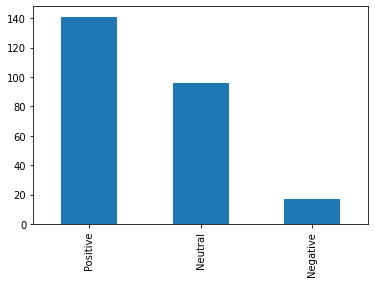

In [78]:
N1_df['sentiment'].value_counts().plot.bar()

###twitter 
https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1

https://developer.twitter.com/en/portal/projects/1482998209811468290/apps/new

In [ ]:
!pip install requests
!pip install requests-oauthlib

In [ ]:
#consumer_key = '2ELZCascjgpBUx1xeq04JjMw2'
#consumer_secret = 'Cb4ceIinJmibdrbbvKpm3hxzwYpZWRxNLQRObEq7Ij96DRm3op'
#access_token = '718636779650191361-gKUkbySle1ElNuodd3AJ0B0NjrEJ1bc'
#access_token_secret = 'AViCLNqNyHgFuiJiYSOI32c0jc3tvkC0Yf3hg0bSy0qWn'

In [ ]:
consumer_key = 'PjvMgtf6razoPwgudurvGCjl2'
consumer_secret = '1jXes3qiIJygBpAByOVzaKDqNyTFB5mYL11VLSU1C9qmhXEzbC'
access_token = '888948484757307392-RxZWEmmjyeTUdwWec5PYMED23ALd0ZH'
access_token_secret = 'zkQCa6NSJ46GS8xlRQ5W8QBoSe5fg13EgdtL8GNPdY7F9'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
pip install backports.ssl_match_hostname

  Created wheel for backports.ssl-match-hostname: filename=backports.ssl_match_hostname-3.7.0.1-py2.py3-none-any.whl size=6756 sha256=85429bf18aa2b4c8358beacfda19371f445373471fbd3ff4fc32f01bcb200ea4
  Stored in directory: /root/.cache/pip/wheels/47/70/47/fa57137a308c61c2891887ba874eec1e0252a857448124896c
Successfully built backports.ssl-match-hostname


In [ ]:
pip install pyOpenSSL pyasn1 certifi

In [ ]:
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

KeyError: ignored

In [ ]:
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search, q='tweepy').items(10):
    print(tweet.text)

TweepError: ignored

In [ ]:
df.loc[(df.date == '2020-11-28')].iloc[[0]]
#tweets should be measure from its emergence on board

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
4900,2020-11-28,1,Mood,24kGoldn Featuring iann dior,1.0,1,15


In [ ]:
def tweetSearch(query, limit):

#This function will search a query provided in the twitter and,
#retun a list of all tweets that have a query.

  # Create a blank variable
  tweets = []
  # Iterate through Twitter using Tweepy to find our query with our defined limit
  for page in tweepy.Cursor(
    api.search, q=query, count=limit, tweet_mode="extended").pages(limit):
    for tweet in page:
      tweets.append(tweet)
  # return tweets
  return tweets

In [ ]:
def tweets_to_data_frame(tweets):

#This function will receive tweets and collect specific data from it such as place, tweet's text,likes
#retweets and save them into a pandas data frame.
#This function will return a pandas data frame that contains data from twitter.

  df = pd.DataFrame(data=[tweet.full_text.encode('utf-8') for tweet in tweets], columns=["Tweets"])
  df["id"] = np.array([tweet.id for tweet in tweets])
  df["lens"] = np.array([len(tweet.full_text) for tweet in tweets])
  df["date"] = np.array([tweet.created_at for tweet in tweets])
  df["place"] = np.array([tweet.place for tweet in tweets])
  df["coordinateS"] = np.array([tweet.coordinates for tweet in tweets])
  df["lang"] = np.array([tweet.lang for tweet in tweets])
  df["source"] = np.array([tweet.source for tweet in tweets])
  df["likes"] = np.array([tweet.favorite_count for tweet in tweets])
  df["retweets"] = np.array([tweet.retweet_count for tweet in tweets])
  return df

In [ ]:
hashtags = ['24kGoldn']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#TweepError: Failed to send request: <_SSLMethod.PROTOCOL_TLS_CLIENT: 16>

total_tweets = 0

#The following for loop will collect a tweets that have the hashtags
#mentioned in the list and save the tweets into csv file

for n in tqdm(hashtags):
  # first we fetch all tweets that have specific hashtag
  hash_tweets = tweetSearch(query=n,limit=100)
  total_tweets += int(len(hash_tweets))
# second we convert our tweets into datarame
df = tweets_to_data_frame(hash_tweets)
#third we save the dataframe into csv file
df.to_csv("data/{}_tweets.csv".format(n))
# show total number of tweets collected
print("total_tweets: {}".format(total_tweets))

  0%|          | 0/1 [00:00<?, ?it/s]


TweepError: ignored

In [ ]:
tweets = []

count = 1


for tweet in tweepy.Cursor(api.search, q="hello", count=450, since='2020-02-28').items(100):
	
	print(count)
	count += 1

	try: 
		data = [tweet.created_at, tweet.id, tweet.text, tweet.user._json['screen_name'], tweet.user._json['name'], tweet.user._json['created_at'], tweet.entities['urls']]
		data = tuple(data)
		tweets.append(data)

	except tweepy.TweepError as e:
		print(e.reason)
		continue

	except StopIteration:
		break

df = pd.DataFrame(tweets, columns = ['created_at','tweet_id', 'tweet_text', 'screen_name', 'name', 'account_creation_date', 'urls'])

TweepError: ignored

##11_99

### youtube

In [ ]:
#scraping

#99 #Practice by DaBaby
#https://youtu.be/1YzXZN37stw


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
Practice =[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/1YzXZN37stw") #Stanford NLP YouTube introduction

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Practice.append(comment.text)

In [ ]:
Practice_ = pd.DataFrame(Practice, columns=['comment'])

Practice_.to_csv('/content/gdrive/My Drive/python files/final project/Nov99.csv', encoding='utf-8', index=False)

In [79]:
#cleaning and preprocessing data

Nov_L = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Nov99.csv")
Nov_L.info()
Nov_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2502 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next in 3\n2:13\n...
1,IG: @DaBaby \nDirected By: @Gemini.one1\nSong ...
2,BRO HIS FLOW IS CRAY
3,I barely see anybody talking about this beat. ...
4,Man I hope Dababy can go through this tough ti...


In [80]:
#drop duplicates and null values
Nov_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Nov_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Nov_L= Nov_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Nov_L['comment'] =Nov_L['comment'].apply(str)
Nov_L['comment'] = Nov_L['comment'].str.lower()

#clear emojis

Nov_L['clean'] = preprocess(Nov_L['comment'])

#clean ios emojis
Nov_L['clean'] = [demoji.replace(x,"") for x in Nov_L.clean]

#clean languages other than english and add to dataset

Nov_L['language'] = 0

count = 0
for i in range(0,len(Nov_L)):

  temp = Nov_L['clean'].iloc[i]
  count += 1
  try:
    Nov_L['language'].iloc[i] = detect(temp)
  except:
    Nov_L['language'].iloc[i] = "error"

#detect and extract only english comments
Nov_L[Nov_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1877
Name: language, dtype: int64

In [81]:
Nov_L = Nov_L[Nov_L['language']=='en'].reset_index(drop=True)

NL_clean = pd.DataFrame(Nov_L, columns = ['clean'])

NL_clean.head()

,clean
0,i barely see anybody talking about this beat. ...
1,man i hope dababy can go through this tough ti...
2,i was not expecting that from that kid bruh he...
3,dababy is so ahead of his time it’s insane. he...
4,i’m so addicted to this song. dababy you’ve go...


In [82]:
NL_clean.count()

clean    1877
dtype: int64

In [83]:
#tokenize, remove stopwords and lemmatize

wnl = nltk.WordNetLemmatizer()

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['-',' +', '^', '.', ':',',','"','!',"’","'","[","]","?","*"]) #remove special characters and most common words that don

def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [wnl.lemmatize(w) for w in word_tokens if not w in stopwords]
    return " ".join(filtered_sentence)

NL_clean['nostop'] = [remove_stopwords(x) for x in NL_clean.clean]

NL_clean.head()

,clean,nostop
0,i barely see anybody talking about this beat. ...,barely see anybody talking beat 's ona whole n...
1,man i hope dababy can go through this tough ti...,man hope dababy go tough time lost brother r.i.p
2,i was not expecting that from that kid bruh he...,expecting kid bruh got bar gold bar
3,dababy is so ahead of his time it’s insane. he...,dababy ahead time insane talented anyone age c...
4,i’m so addicted to this song. dababy you’ve go...,addicted song dababy got explain added song ma...


In [84]:
#find polarity

NL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in NL_clean.nostop]

NL_clean['sentiment'] = 0

NL_clean['sentiment'][NL_clean.polarity > 0] = "Positive"
NL_clean['sentiment'][NL_clean.polarity == 0] = "Neutral"
NL_clean['sentiment'][NL_clean.polarity < 0] = "Negative"
NL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,clean,nostop,polarity,sentiment
0,i barely see anybody talking about this beat. ...,barely see anybody talking beat 's ona whole n...,0.0000,Neutral
1,man i hope dababy can go through this tough ti...,man hope dababy go tough time lost brother r.i.p,0.0258,Positive
2,i was not expecting that from that kid bruh he...,expecting kid bruh got bar gold bar,0.0000,Neutral
3,dababy is so ahead of his time it’s insane. he...,dababy ahead time insane talented anyone age c...,0.5994,Positive
4,i’m so addicted to this song. dababy you’ve go...,addicted song dababy got explain added song ma...,0.0000,Neutral


In [85]:
NL_clean.count()

clean        1877
nostop       1877
polarity     1877
sentiment    1877
dtype: int64

Positive    735
Neutral     701
Negative    441
Name: sentiment, dtype: int64

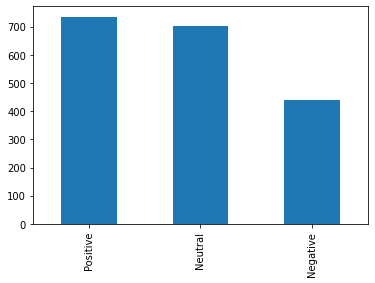

In [86]:
#see the balance between pos/neg

NL_clean['sentiment'].value_counts().plot.bar()
NL_clean['sentiment'].value_counts()

In [87]:
#lexicon chart

t = NL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
NL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

NL_tscore = NL_score.T 
NL_tscore

Emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
Score,4,2,1,17,4,5,8,2,2,1


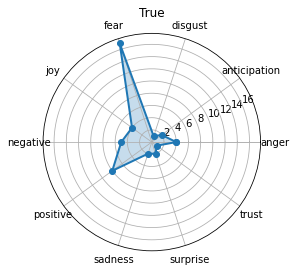

In [88]:
#make rader chart

labels=np.array(emotion)
stats=NL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(NL_tscore.iloc[0].all())
ax.grid(True)

In [89]:
November = N1_clean.sentiment.value_counts(normalize=True).to_frame()
November = November.rename(columns={'sentiment': 'November 1'}).T

N_L_df = NL_clean.sentiment.value_counts(normalize=True).to_frame()
N_L_df = N_L_df.rename(columns={'sentiment': 'November last'}).T
November = November.append(N_L_df)
ranking = ["1","0"]
November["Ranking"] = ranking
November

,Positive,Neutral,Negative,Ranking
November 1,0.548903,0.340249,0.110848,1
November last,0.391582,0.373468,0.234949,0


#December 2020

In [92]:
#see what is the last day of month with available data
df.loc[(df['date'].dt.month==12)&(df['date'].dt.year==2020)]
#2020-12-26 #On christmas so maybe biased results?

#get first and last rows of df which only includes data from the date found above
Dec = df.loc[(df.date == '2020-12-26')].iloc[[0,-3,-2,-1]]

Dec

#1 #Willow by Taylor Swift
#https://youtu.be/RsEZmictANA

#100 - no music video

#99 - no music video

#98 #Errbody by Lil Baby
#https://youtu.be/pKtUpBjIl-g

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
4500,2020-12-26,1,Willow,Taylor Swift,NaN,1,1
4597,2020-12-26,98,Errbody,Lil Baby,41.0,41,2
4598,2020-12-26,99,Favorite Time Of Year,Carrie Underwood,80.0,80,3
4599,2020-12-26,100,Beautiful Trip,Kid Cudi,NaN,100,1


##12_1

In [ ]:
#scraping

#1 #Willow by Taylor Swift
#https://youtu.be/RsEZmictANA


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Willow =[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/RsEZmictANA") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)


for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Willow.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
Willow_ = pd.DataFrame(Willow, columns=['comment'])

Willow_.to_csv('/content/gdrive/My Drive/python files/final project/Dec1.csv', encoding='utf-8', index=False)

In [93]:
#cleaning and preprocessing data

Dec_1 = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Dec1.csv")
Dec_1.info()
Dec_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2259 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next\n4:35\nTaylo...
1,Official music video by Taylor Swift performin...
2,obsessed with the tune it’s so gentle almost f...
3,"She is like wine. The more time passes, the be..."
4,I hate that Evermore received so less promotio...


In [94]:
#drop duplicates and null values
Dec_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Dec_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Dec_1= Dec_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Dec_1['comment'] =Dec_1['comment'].apply(str)
Dec_1['comment'] = Dec_1['comment'].str.lower()

#clear emojis

Dec_1['clean'] = preprocess(Dec_1['comment'])

#clean ios emojis
Dec_1['clean'] = [demoji.replace(x,"") for x in Dec_1.clean]

#clean languages other than english and add to dataset

Dec_1['language'] = 0

count = 0
for i in range(0,len(Dec_1)):

  temp = Dec_1['clean'].iloc[i]
  count += 1
  try:
    Dec_1['language'].iloc[i] = detect(temp)
  except:
    Dec_1['language'].iloc[i] = "error"

#detect and extract only english comments
Dec_1[Dec_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1691
Name: language, dtype: int64

In [95]:
Dec_1 = Dec_1[Dec_1['language']=='en'].reset_index(drop=True)

D1_clean = pd.DataFrame(Dec_1, columns = ['clean'])

D1_clean.head()

,clean
0,obsessed with the tune it’s so gentle almost f...
1,"she is like wine. the more time passes, the be..."
2,i hate that evermore received so less promotio...
3,"acording to spotify, this was the taylor swift..."
4,can't believe it's already been 1 year since t...


In [96]:
D1_clean.count()

clean    1691
dtype: int64

In [97]:
#tokenize, remove stopwords and lemmatize

D1_clean['nostop'] = [remove_stopwords(x) for x in D1_clean.clean]

D1_clean.head()

,clean,nostop
0,obsessed with the tune it’s so gentle almost f...,obsessed tune gentle almost feel like soft hug
1,"she is like wine. the more time passes, the be...",like wine time pass better get
2,i hate that evermore received so less promotio...,hate evermore received le promotion le masterp...
3,"acording to spotify, this was the taylor swift...",acording spotify taylor swift 's song listened...
4,can't believe it's already been 1 year since t...,ca n't believe 's already 1 year since masterp...


In [98]:
#find polarity

D1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in D1_clean.nostop]

D1_clean['sentiment'] = 0

D1_clean['sentiment'][D1_clean.polarity > 0] = "Positive"
D1_clean['sentiment'][D1_clean.polarity == 0] = "Neutral"
D1_clean['sentiment'][D1_clean.polarity < 0] = "Negative"
D1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,clean,nostop,polarity,sentiment
0,obsessed with the tune it’s so gentle almost f...,obsessed tune gentle almost feel like soft hug,0.7595,Positive
1,"she is like wine. the more time passes, the be...",like wine time pass better get,0.6597,Positive
2,i hate that evermore received so less promotio...,hate evermore received le promotion le masterp...,0.1027,Positive
3,"acording to spotify, this was the taylor swift...",acording spotify taylor swift 's song listened...,0.2023,Positive
4,can't believe it's already been 1 year since t...,ca n't believe 's already 1 year since masterp...,0.8316,Positive


Positive    1106
Neutral      432
Negative     153
Name: sentiment, dtype: int64

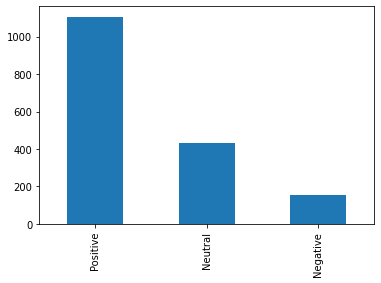

In [99]:
#see the balance between pos/neg

D1_clean['sentiment'].value_counts().plot.bar()
D1_clean['sentiment'].value_counts()

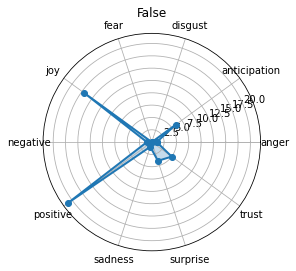

In [100]:
#lexicon chart

t = D1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
D1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

D1_tscore = D1_score.T 

#make rader chart

labels=np.array(emotion)
stats=D1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(D1_tscore.iloc[0].all())
ax.grid(True)

##12_98

In [ ]:
#scraping

#98 #Errbody by Lil Baby
#https://youtu.be/pKtUpBjIl-g


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Errbody =[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/pKtUpBjIl-g") #Stanford NLP YouTube introduction

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Errbody.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
Errbody_ = pd.DataFrame(Errbody, columns=['comment',''])

Errbody_.to_csv('/content/gdrive/My Drive/python files/final project/Dec98.csv', encoding='utf-8', index=False)

In [101]:
#cleaning and preprocessing data

Dec_L = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Dec98.csv")
Dec_L.info()
Dec_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1684 non-null   object
dtypes: object(1)
memory usage: 13.7+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next\n3:26\nLil B...
1,"""Stream/Download Lil Baby's """"Errbody"""" here: ..."
2,I wish Errbody a Good 2021
3,Can’t stop bumping this man !
4,Lil Babys music just does something to my soul...


In [102]:
#drop duplicates and null values
Dec_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Dec_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Dec_L= Dec_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Dec_L['comment'] =Dec_L['comment'].apply(str)
Dec_L['comment'] = Dec_L['comment'].str.lower()

#clear emojis

Dec_L['clean'] = preprocess(Dec_L['comment'])

#clean ios emojis
Dec_L['clean'] = [demoji.replace(x,"") for x in Dec_L.clean]

#clean languages other than english and add to dataset

Dec_L['language'] = 0

count = 0
for i in range(0,len(Dec_L)):

  temp = Dec_1['clean'].iloc[i]
  count += 1
  try:
    Dec_L['language'].iloc[i] = detect(temp)
  except:
    Dec_L['language'].iloc[i] = "error"

#detect and extract only english comments
Dec_L[Dec_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1646
Name: language, dtype: int64

In [103]:
Dec_L = Dec_L[Dec_L['language']=='en'].reset_index(drop=True)

DL_clean = pd.DataFrame(Dec_L, columns = ['clean'])

DL_clean.head()

,clean
0,i wish errbody a good 2021
1,can’t stop bumping this man !
2,lil babys music just does something to my soul...
3,"protect this dude not tryna see mfs saying ""ri..."
4,his flow on that 2nd verse was fire


In [104]:
DL_clean.count()

clean    1646
dtype: int64

In [105]:
#tokenize, remove stopwords and lemmatize

DL_clean['nostop'] = [remove_stopwords(x) for x in DL_clean.clean]

DL_clean.head()

,clean,nostop
0,i wish errbody a good 2021,wish errbody good 2021
1,can’t stop bumping this man !,stop bumping man
2,lil babys music just does something to my soul...,lil baby music something soul make body shake ...
3,"protect this dude not tryna see mfs saying ""ri...",protect dude tryna see mf saying `` rip lil ba...
4,his flow on that 2nd verse was fire,flow 2nd verse fire


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Positive    650
Neutral     599
Negative    397
Name: sentiment, dtype: int64

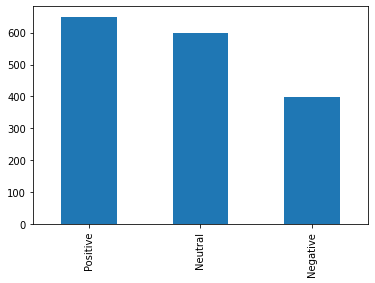

In [106]:
#find polarity

DL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in DL_clean.nostop]

DL_clean['sentiment'] = 0

DL_clean['sentiment'][DL_clean.polarity > 0] = "Positive"
DL_clean['sentiment'][DL_clean.polarity == 0] = "Neutral"
DL_clean['sentiment'][DL_clean.polarity < 0] = "Negative"

DL_clean['sentiment'].value_counts().plot.bar()
DL_clean['sentiment'].value_counts()

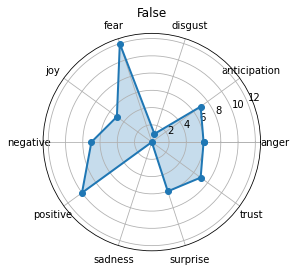

In [107]:
#lexicon chart

t = DL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
DL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

DL_tscore = DL_score.T 

#make rader chart

labels=np.array(emotion)
stats=DL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(DL_tscore.iloc[0].all())
ax.grid(True)

In [108]:
December = D1_clean.sentiment.value_counts(normalize=True).to_frame()
December = December.rename(columns={'sentiment': 'December 1'}).T

D_L_df = DL_clean.sentiment.value_counts(normalize=True).to_frame()
D_L_df = D_L_df.rename(columns={'sentiment': 'December last'}).T
December = December.append(D_L_df)
December["Ranking"] = ["1","0"]
December

,Positive,Neutral,Negative,Ranking
December 1,0.654051,0.255470,0.090479,1
December last,0.394897,0.363913,0.241191,0


#January

In [109]:
#see what is the last day of month with available data
df.loc[(df['date'].dt.month==1)&(df['date'].dt.year==2021)]
#2021-01-30

#get first and last rows of df which only includes data from the date found above
Jan = df.loc[(df.date == '2021-01-30')].iloc[[0,1,-3,-2,-1]]

Jan

#2nd song bc no.1 song (drivers license) held spot for 2 months 

#2 #34+35 by Ariana Grande
#https://youtu.be/B6_iQvaIjXw

#100 #Dangerous by Morgan Wallen (peak rank:62) #no music video
#99 - no music video
#98 #One Too Many by Keith Urban with P!nk
#https://youtu.be/cy1rAn9MLtQ


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
4000,2021-01-30,1,Drivers License,Olivia Rodrigo,1.0,1,2
4001,2021-01-30,2,34+35,Ariana Grande,11.0,2,12
4097,2021-01-30,98,One Too Many,Keith Urban Duet With P!nk,NaN,62,6
4098,2021-01-30,99,Hell Of A View,Eric Church,NaN,94,2
4099,2021-01-30,100,Dangerous,Morgan Wallen,62.0,62,2


##1_2

https://www.analyticssteps.com/blogs/sentiment-analysis-youtube-comments

In [ ]:
#scraping

#2 #34+35 by Ariana Grande
#https://youtu.be/B6_iQvaIjXw


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ariana =[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/B6_iQvaIjXw") #Stanford NLP YouTube introduction

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Ariana.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
import pandas as pd   
Ariana_ = pd.DataFrame(Ariana, columns=['comment'])

#export dataframe as csv to my google drive bc the scraping process takes up too much time and space to run everytime
Ariana_.to_csv('/content/gdrive/My Drive/python files/final project/Jan_2.csv', encoding='utf-8', index=False)

In [110]:
#cleaning and preprocessing data

#!!name all data of top song of each month as 'songname_1' !!!!!!
Jan_1 = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Jan_2.csv")
Jan_1.info()
Jan_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  3021 non-null   object
dtypes: object(1)
memory usage: 23.7+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n1:47:10\nArianaGrand...
1,The official “34+35” music video by Ariana Gra...
2,SHE SERVED CHOREO
3,I can't stop to listen to this song… almost on...
4,There really is nothing to dislike about this ...


In [111]:
#drop duplicates and null values
Jan_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Jan_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Jan_1= Jan_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Jan_1['comment'] = Jan_1['comment'].apply(str)
Jan_1['comment'] = Jan_1['comment'].str.lower()

#clear emojis

Jan_1['clean'] = preprocess(Jan_1['comment'])

#clean ios emojis
Jan_1['clean'] = [demoji.replace(x,"") for x in Jan_1.clean]

#clean languages other than english and add to dataset

Jan_1['language'] = 0

count = 0
for i in range(0,len(Dec_1)):

  temp = Jan_1['clean'].iloc[i]
  count += 1
  try:
    Jan_1['language'].iloc[i] = detect(temp)
  except:
    Jan_1['language'].iloc[i] = "error"

#detect and extract only english comments
Jan_1[Jan_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1182
Name: language, dtype: int64

In [112]:
Jan_1 = Jan_1[Jan_1['language']=='en'].reset_index(drop=True)

J1_clean = pd.DataFrame(Jan_1, columns = ['clean'])

J1_clean.head()

,clean
0,she served choreo
1,there really is nothing to dislike about this ...
2,when she sang this live i could not stop screa...
3,"what a queen, she made a song about math and e..."
4,she has truly come a long long way from her st...


In [113]:
J1_clean.count()

clean    1182
dtype: int64

In [114]:
#tokenize, remove stopwords and lemmatize

J1_clean['nostop'] = [remove_stopwords(x) for x in J1_clean.clean]

J1_clean.head()

,clean,nostop
0,she served choreo,served choreo
1,there really is nothing to dislike about this ...,really nothing dislike song perfectly made
2,when she sang this live i could not stop screa...,sang live could stop screaming vocal amazing a...
3,"what a queen, she made a song about math and e...",queen made song math even gave u math question...
4,she has truly come a long long way from her st...,truly come long long way start nickelodeon pro...


In [115]:
#find polarity

J1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in J1_clean.nostop]

J1_clean['sentiment'] = 0

J1_clean['sentiment'][J1_clean.polarity > 0] = "Positive"
J1_clean['sentiment'][J1_clean.polarity == 0] = "Neutral"
J1_clean['sentiment'][J1_clean.polarity < 0] = "Negative"
J1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,clean,nostop,polarity,sentiment
0,she served choreo,served choreo,0.0000,Neutral
1,there really is nothing to dislike about this ...,really nothing dislike song perfectly made,-0.2277,Negative
2,when she sang this live i could not stop screa...,sang live could stop screaming vocal amazing a...,0.6369,Positive
3,"what a queen, she made a song about math and e...",queen made song math even gave u math question...,-0.0516,Negative
4,she has truly come a long long way from her st...,truly come long long way start nickelodeon pro...,0.7184,Positive


Positive    1284
Neutral      635
Negative     214
Name: sentiment, dtype: int64

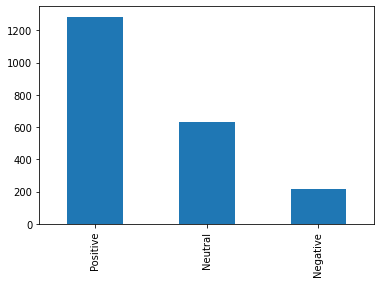

In [224]:
#see the balance between pos/neg

J1_clean['sentiment'].value_counts().plot.bar()
J1_clean['sentiment'].value_counts()

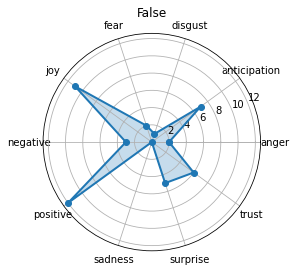

In [116]:
#lexicon chart

t = J1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
J1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

J1_tscore = J1_score.T 

#make rader chart

labels=np.array(emotion)
stats=J1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(J1_tscore.iloc[0].all())
ax.grid(True)

##1_98

In [ ]:
#scraping

#98 #One Too Many by Keith Urban with P!nk
#https://youtu.be/cy1rAn9MLtQ


sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

One_Too_Many=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/cy1rAn9MLtQ") #Stanford NLP YouTube introduction

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  One_Too_Many.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
OTM= pd.DataFrame(One_Too_Many, columns=['comment'])

#export dataframe as csv to my google drive bc the scraping process takes up too much time and space to run everytime
OTM.to_csv('/content/gdrive/MyDrive/python files/final project/Jan98.csv', encoding='utf-8', index=False)

In [117]:
#cleaning data

#!!name all data of top song of each month as 'songname_L' !!!!!! L means last bc its most likely that bottom songs have music videos so the ranking of bottom songs vary

Jan_L = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Jan98.csv")
Jan_L.info()
Jan_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1404 non-null   object
dtypes: object(1)
memory usage: 11.7+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n6:40\nKeith Urban & ...
1,The official music video for “One Too Many” wi...
2,No matter what P!nk genre's is she always slay...
3,I love that she just loved every genre of musi...
4,Their voices are perfect together. I absolutel...


In [118]:
#drop duplicates and null values
Jan_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Jan_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Jan_L= Jan_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Jan_L['comment'] = Jan_L['comment'].apply(str)
Jan_L['comment'] = Jan_L['comment'].str.lower()

#clear emojis

Jan_L['clean'] = preprocess(Jan_L['comment'])

#clean ios emojis
Jan_L['clean'] = [demoji.replace(x,"") for x in Jan_L.clean]

#clean languages other than english and add to dataset

Jan_L['language'] = 0

count = 0
for i in range(0,len(Jan_L)):

  temp = Jan_L['clean'].iloc[i]
  count += 1
  try:
    Jan_L['language'].iloc[i] = detect(temp)
  except:
    Jan_L['language'].iloc[i] = "error"

#detect and extract only english comments
Jan_L[Jan_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1094
Name: language, dtype: int64

In [119]:
Jan_L = Jan_L[Jan_L['language']=='en'].reset_index(drop=True)

JL_clean = pd.DataFrame(Jan_L, columns = ['clean'])

JL_clean.head()

,clean
0,no matter what p!nk genre's is she always slay...
1,i love that she just loved every genre of musi...
2,their voices are perfect together. i absolutel...
3,this is proof that music nowadays doesn't nece...
4,love this song! keith urban & pink are awesom...


In [120]:
JL_clean.count()

clean    1094
dtype: int64

In [121]:
#tokenize, remove stopwords and lemmatize

JL_clean['nostop'] = [remove_stopwords(x) for x in JL_clean.clean]

JL_clean.head()

,clean,nostop
0,no matter what p!nk genre's is she always slay...,matter p nk genre 's always slays ...
1,i love that she just loved every genre of musi...,love loved every genre music pigeon hole duet ...
2,their voices are perfect together. i absolutel...,voice perfect together absolutely love son aut...
3,this is proof that music nowadays doesn't nece...,proof music nowadays n't necessarily suck
4,love this song! keith urban & pink are awesom...,love song keith urban & pink awesome voice ble...


In [122]:
#find polarity

JL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in JL_clean.nostop]

JL_clean['sentiment'] = 0

JL_clean['sentiment'][JL_clean.polarity > 0] = "Positive"
JL_clean['sentiment'][JL_clean.polarity == 0] = "Neutral"
JL_clean['sentiment'][JL_clean.polarity < 0] = "Negative"
JL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,clean,nostop,polarity,sentiment
0,no matter what p!nk genre's is she always slay...,matter p nk genre 's always slays ...,0.0258,Positive
1,i love that she just loved every genre of musi...,love loved every genre music pigeon hole duet ...,0.9612,Positive
2,their voices are perfect together. i absolutel...,voice perfect together absolutely love son aut...,0.9652,Positive
3,this is proof that music nowadays doesn't nece...,proof music nowadays n't necessarily suck,0.3412,Positive
4,love this song! keith urban & pink are awesom...,love song keith urban & pink awesome voice ble...,0.8860,Positive


Positive    863
Neutral     387
Negative    179
Name: sentiment, dtype: int64

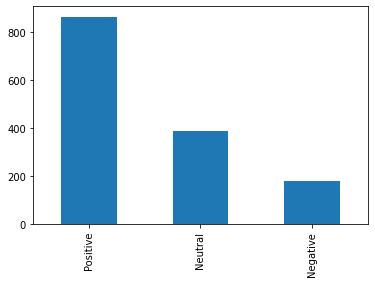

In [225]:
#see the balance between pos/neg

JL_clean['sentiment'].value_counts().plot.bar()
JL_clean['sentiment'].value_counts()

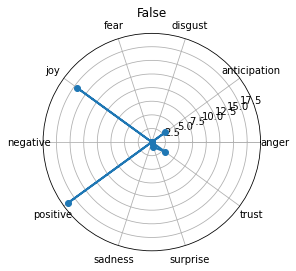

In [123]:
#lexicon chart

t = JL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
JL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

JL_tscore = JL_score.T 

#make rader chart

labels=np.array(emotion)
stats=JL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(JL_tscore.iloc[0].all())
ax.grid(True)

In [227]:
January = J1_clean.sentiment.value_counts(normalize=True).to_frame()
January = January.rename(columns={'sentiment': 'January 1'}).T

J_L_df = JL_clean.sentiment.value_counts(normalize=True).to_frame()
J_L_df = J_L_df.rename(columns={'sentiment': 'January last'}).T
January = January.append(J_L_df)
January["Ranking"] = ["1","0"]
January

,Positive,Neutral,Negative,Ranking
January 1,0.601969,0.297703,0.100328,1
January last,0.603919,0.270819,0.125262,0


#February

In [125]:
#see what is the last day of month with available data
df.loc[(df['date'].dt.month==2)&(df['date'].dt.year==2021)]
#2021-02-27

Feb = df.loc[(df.date == '2021-02-27')].iloc[[0,-2]]

Feb

#1 #Drivers License by Olivia Rodrigo (peak rank: 1)

#100 #How They Remember You by Rascal Flatts (peak rank:100) #no music video
#99 #Opp Stoppa by YBN Nahmir featuring 21 Savage
#https://youtu.be/UXXGfp-z850

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
3600,2021-02-27,1,Drivers License,Olivia Rodrigo,1.0,1,6
3698,2021-02-27,99,Opp Stoppa,YBN Nahmir Featuring 21 Savage,NaN,97,2


##2_1

In [ ]:
#1 ###TWO MONTHS IN A ROW

#1 #Drivers License by Olivia Rodrigo (peak rank: 1)
#https://youtu.be/ZmDBbnmKpqQ

##scraping!!

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Drivers_License=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/ZmDBbnmKpqQ") #Stanford NLP YouTube introduction

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Drivers_License.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [ ]:
Drivers_License_= pd.DataFrame(Drivers_License, columns=['comment'])

#export dataframe as csv to my google drive bc the scraping process takes up too much time and space to run everytime
Drivers_License_.to_csv('/content/gdrive/My Drive/python files/final project/Feb_1.csv', encoding='utf-8', index=False)

In [126]:
#cleaning and preprocessing data

#!!name all data of top song of each month as 'songname_1' !!!!!!
Feb_1 = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Feb_1.csv")
Feb_1.info()
Feb_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3620 entries, 0 to 3619
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  3591 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n4:19\nOlivia Rodrigo...
1,Listen to ‘drivers license’ out now: https://s...
2,"""she's everything I'm insecure about""\n\nOhhho..."
3,A verdade que essa música fala comigo e traz s...
4,Não conhecia essa jovem que canta em inglês co...


In [127]:
#drop duplicates and null values
Feb_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Feb_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Feb_1= Feb_1.drop(labels=[0,1,2], axis=0).reset_index(drop=True)

#lowercase data
Feb_1['comment'] = Feb_1['comment'].apply(str)
Feb_1['comment'] = Feb_1['comment'].str.lower()

#clear emojis

Feb_1['clean'] = preprocess(Feb_1['comment'])

#clean ios emojis
Feb_1['clean'] = [demoji.replace(x,"") for x in Feb_1.clean]

#clean languages other than english and add to dataset

Feb_1['language'] = 0

count = 0
for i in range(0,len(Feb_1)):

  temp = Feb_1['clean'].iloc[i]
  count += 1
  try:
    Feb_1['language'].iloc[i] = detect(temp)
  except:
    Feb_1['language'].iloc[i] = "error"

#detect and extract only english comments
Feb_1[Feb_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    2497
Name: language, dtype: int64

In [128]:
Feb_1 = Feb_1[Feb_1['language']=='en'].reset_index(drop=True)

F1_clean = pd.DataFrame(Feb_1, columns = ['clean'])

F1_clean.head()

,clean
0,god this song is everything. chills. that clim...
1,lyrics\n\ni got my driver's license last week\...
2,this is one of those songs that's so close to ...
3,"brilliant song, nothing more can be said about..."
4,i miss the days when this song would almost al...


In [129]:
F1_clean.count()

clean    2497
dtype: int64

In [130]:
#tokenize, remove stopwords and lemmatize

F1_clean['nostop'] = [remove_stopwords(x) for x in F1_clean.clean]

F1_clean.head()

,clean,nostop
0,god this song is everything. chills. that clim...,god song everything chill climax perfection
1,lyrics\n\ni got my driver's license last week\...,lyric got driver 's license last week like alw...
2,this is one of those songs that's so close to ...,one song 's close real life hurt good ca n't s...
3,"brilliant song, nothing more can be said about...",brilliant song nothing said incredible
4,i miss the days when this song would almost al...,miss day song would almost always play radio


In [131]:
#find polarity

F1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in F1_clean.nostop]

F1_clean['sentiment'] = 0

F1_clean['sentiment'][F1_clean.polarity > 0] = "Positive"
F1_clean['sentiment'][F1_clean.polarity == 0] = "Neutral"
F1_clean['sentiment'][F1_clean.polarity < 0] = "Negative"
F1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,clean,nostop,polarity,sentiment
0,god this song is everything. chills. that clim...,god song everything chill climax perfection,0.7003,Positive
1,lyrics\n\ni got my driver's license last week\...,lyric got driver 's license last week like alw...,0.3612,Positive
2,this is one of those songs that's so close to ...,one song 's close real life hurt good ca n't s...,0.3359,Positive
3,"brilliant song, nothing more can be said about...",brilliant song nothing said incredible,0.5859,Positive
4,i miss the days when this song would almost al...,miss day song would almost always play radio,0.1335,Positive


Positive    1403
Neutral      588
Negative     506
Name: sentiment, dtype: int64

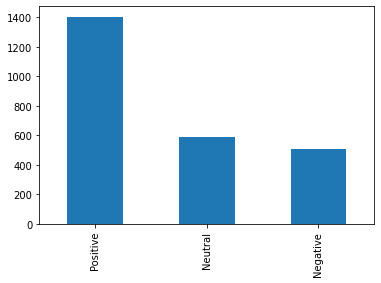

In [228]:
#see the balance between pos/neg

F1_clean['sentiment'].value_counts().plot.bar()
F1_clean['sentiment'].value_counts()

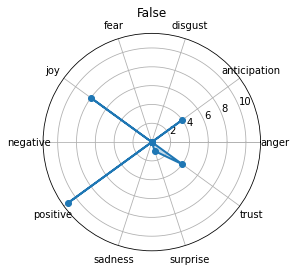

In [132]:
#lexicon chart

t = F1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
F1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

F1_tscore = F1_score.T 

#make rader chart

labels=np.array(emotion)
stats=F1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(F1_tscore.iloc[0].all())
ax.grid(True)

##2_99


In [ ]:
##scraping

#99 #Opp Stoppa by YBN Nahmir featuring 21 Savage
#https://youtu.be/UXXGfp-z850

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Opp_Stoppa=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/UXXGfp-z850") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Opp_Stoppa.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Opp_Stoppa_= pd.DataFrame(Opp_Stoppa, columns=['comment'])

Opp_Stoppa_.to_csv('/content/drive/My Drive/python files/final project/Feb99.csv', encoding='utf-8', index=False)

In [133]:
##cleaning data

Feb_L = pd.read_csv("/content/gdrive/MyDrive/python files/final project/Feb99.csv")
Feb_L.info()
Feb_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1288 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n2:54\nLil Loaded ft....
1,YBN Nahmir - Opp Stoppa (feat. 21 Savage)\nSt...
2,21 being held hostage
3,"What a talented young man, I hope he doesn’t f..."
4,Man this guy’s good! I hope he does not make a...


In [134]:
#drop duplicates and null values
Feb_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Feb_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Feb_L= Feb_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Feb_L['comment'] = Feb_L['comment'].apply(str)
Feb_L['comment'] = Feb_L['comment'].str.lower()

#clear emojis

Feb_L['clean'] = preprocess(Feb_L['comment'])

#clean ios emojis
Feb_L['clean'] = [demoji.replace(x,"") for x in Feb_L.clean]

#clean languages other than english and add to dataset

Feb_L['language'] = 0

count = 0
for i in range(0,len(Feb_L)):

  temp = Feb_L['clean'].iloc[i]
  count += 1
  try:
    Feb_L['language'].iloc[i] = detect(temp)
  except:
    Feb_L['language'].iloc[i] = "error"

#detect and extract only english comments
Feb_L[Feb_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1067
Name: language, dtype: int64

In [135]:
Feb_L = Feb_L[Feb_L['language']=='en'].reset_index(drop=True)

FL_clean = pd.DataFrame(Feb_L, columns = ['clean'])

FL_clean.head()

,clean
0,"what a talented young man, i hope he doesn’t f..."
1,man this guy’s good! i hope he does not make a...
2,this guy has some talent i hope he don’t make ...
3,"what a talented young man, i hope he dont glid..."
4,21 looks like he’s in the wrong hood and he kn...


In [136]:
FL_clean.count()

clean    1067
dtype: int64

In [137]:
#tokenize, remove stopwords and lemmatize

FL_clean['nostop'] = [remove_stopwords(x) for x in FL_clean.clean]

#find polarity

FL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in FL_clean.nostop]

FL_clean['sentiment'] = 0

FL_clean['sentiment'][FL_clean.polarity > 0] = "Positive"
FL_clean['sentiment'][FL_clean.polarity == 0] = "Neutral"
FL_clean['sentiment'][FL_clean.polarity < 0] = "Negative"
FL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"what a talented young man, i hope he doesn’t f...",talented young man hope feel like much,0.8271,Positive
1,man this guy’s good! i hope he does not make a...,man guy good hope make song called “ soul train ”,0.7003,Positive
2,this guy has some talent i hope he don’t make ...,guy talent hope make song called “ soul train ”,0.6908,Positive
3,"what a talented young man, i hope he dont glid...",talented young man hope dont glide slide,0.7351,Positive
4,21 looks like he’s in the wrong hood and he kn...,21 look like wrong hood know,-0.1531,Negative


Positive    480
Negative    299
Neutral     288
Name: sentiment, dtype: int64

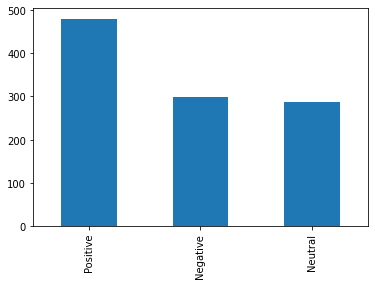

In [229]:
#see the balance between pos/neg

FL_clean['sentiment'].value_counts().plot.bar()
FL_clean['sentiment'].value_counts()

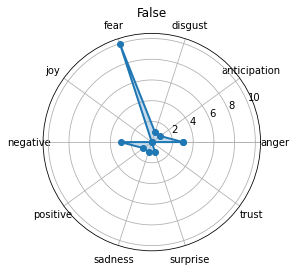

In [138]:
#lexicon chart

t = FL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
FL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

FL_tscore = FL_score.T 

#make rader chart

labels=np.array(emotion)
stats=FL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(FL_tscore.iloc[0].all())
ax.grid(True)

In [230]:
February = F1_clean.sentiment.value_counts(normalize=True).to_frame()
February = February.rename(columns={'sentiment': 'February 1'}).T

F_L_df = FL_clean.sentiment.value_counts(normalize=True).to_frame()
F_L_df = F_L_df.rename(columns={'sentiment': 'February last'}).T
February = February.append(F_L_df)
February["Ranking"] = ["1","0"]
February 

,Positive,Neutral,Negative,Ranking
February 1,0.561874,0.235483,0.202643,1
February last,0.449859,0.269916,0.280225,0


#March

In [140]:
df.loc[(df['date'].dt.month==3)&(df['date'].dt.year==2021)]
 #2021-03-27

March = df.loc[(df.date == '2021-03-27')].iloc[[0,-1]]

March

#1 
#Up by Cardi B (peak rank: 1)
#https://youtu.be/rCiBgLOcuKU

#100
#Undivided by Tim McGraw & Tyler Hubbard (peak rank: 76)
#https://youtu.be/nsFb67fo7nE


,date,rank,song,artist,last-week,peak-rank,weeks-on-board
3200,2021-03-27,1,Up,Cardi B,6.0,1,6
3299,2021-03-27,100,Undivided,Tim McGraw & Tyler Hubbard,NaN,76,2


##3_1

In [ ]:
##scraping

#1 
#Up by Cardi B (peak rank: 1)
#https://youtu.be/rCiBgLOcuKU

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Up=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/rCiBgLOcuKU") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Up.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
Up_= pd.DataFrame(Up, columns=['comment'])

Up_.to_csv('/content/gdrive/My Drive/python files/final project/March1.csv', encoding='utf-8', index=False)

In [141]:
##cleaning data

March_1 = pd.read_csv("/content/gdrive/MyDrive/python files/final project/March1.csv")
March_1.info()
March_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1572 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n0:00 / 2:49\nSHOW CH...
1,Cardi B - Up\nStream/Download - https://cardib...
2,Disney gone wild
3,"Hate her or not, this girl is still making ama..."
4,whoever is styling her deserves all the flower...


In [142]:
#drop duplicates and null values
March_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
March_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

March_1= March_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
March_1['comment'] = March_1['comment'].apply(str)
March_1['comment'] = March_1['comment'].str.lower()

#clear emojis

March_1['clean'] = preprocess(March_1['comment'])

#clean ios emojis
March_1['clean'] = [demoji.replace(x,"") for x in March_1.clean]

#clean languages other than english and add to dataset

March_1['language'] = 0

count = 0
for i in range(0,len(March_1)):

  temp = March_1['clean'].iloc[i]
  count += 1
  try:
    March_1['language'].iloc[i] = detect(temp)
  except:
    March_1['language'].iloc[i] = "error"

#detect and extract only english comments
March_1[March_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1103
Name: language, dtype: int64

In [143]:
March_1 = March_1[March_1['language']=='en'].reset_index(drop=True)

M1_clean = pd.DataFrame(March_1, columns = ['clean'])

M1_clean.head()

,clean
0,"hate her or not, this girl is still making ama..."
1,whoever is styling her deserves all the flower...
2,producer: okay cardi what do you wanna wear fo...
3,she puts so much effort into her visuals. noon...
4,it's catchy


In [144]:
M1_clean.count()

clean    1103
dtype: int64

In [145]:
#tokenize, remove stopwords and lemmatize

M1_clean['nostop'] = [remove_stopwords(x) for x in M1_clean.clean]

#find polarity

M1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in M1_clean.nostop]

M1_clean['sentiment'] = 0

M1_clean['sentiment'][M1_clean.polarity > 0] = "Positive"
M1_clean['sentiment'][M1_clean.polarity == 0] = "Neutral"
M1_clean['sentiment'][M1_clean.polarity < 0] = "Negative"
M1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"hate her or not, this girl is still making ama...",hate girl still making amazing song,0.0258,Positive
1,whoever is styling her deserves all the flower...,whoever styling deserves flower look everything,0.0000,Neutral
2,producer: okay cardi what do you wanna wear fo...,producer okay cardi wan na wear stair case sce...,0.5994,Positive
3,she puts so much effort into her visuals. noon...,put much effort visuals noone touching category,0.0000,Neutral
4,it's catchy,'s catchy,0.0000,Neutral


Positive    882
Neutral     280
Negative    269
Name: sentiment, dtype: int64

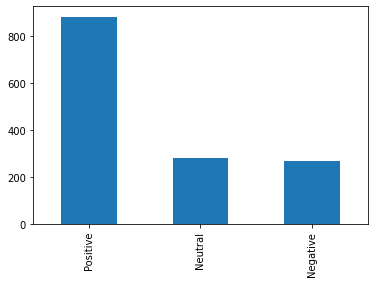

In [231]:
#see the balance between pos/neg

M1_clean['sentiment'].value_counts().plot.bar()
M1_clean['sentiment'].value_counts()

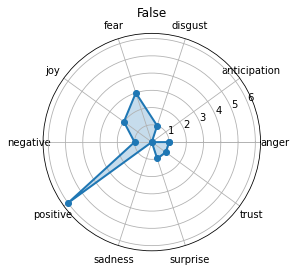

In [146]:
#lexicon chart

t = M1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
M1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

M1_tscore = M1_score.T 

#make rader chart

labels=np.array(emotion)
stats=M1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(M1_tscore.iloc[0].all())
ax.grid(True)

##3_100

In [ ]:
##scraping


#100
#Undivided by Tim McGraw & Tyler Hubbard (peak rank: 76)
#https://youtu.be/nsFb67fo7nE

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Undivided=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/nsFb67fo7nE") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Undivided.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [ ]:
Undivided_= pd.DataFrame(Undivided, columns=['comment'])

Undivided_.to_csv('/content/gdrive/My Drive/python files/final project/March100.csv', encoding='utf-8', index=False)

In [147]:
##cleaning data

March_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/March100.csv")
March_L.info()
March_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1284 non-null   object
dtypes: object(1)
memory usage: 10.3+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n3:58\nTim McGraw - M...
1,Official music video for Tim McGraw and Tyler ...
2,I wish everyone can take this song into their ...
3,"So many people need to really hear this song, ..."
4,"WOOHOO! Just now heard this, for the first ti..."


In [148]:
#drop duplicates and null values
March_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
March_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

March_L= March_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
March_L['comment'] = March_L['comment'].apply(str)
March_L['comment'] = March_L['comment'].str.lower()

#clear emojis

March_L['clean'] = preprocess(March_L['comment'])

#clean ios emojis
March_L['clean'] = [demoji.replace(x,"") for x in March_L.clean]

#clean languages other than english and add to dataset

March_L['language'] = 0

count = 0
for i in range(0,len(March_L)):

  temp = March_L['clean'].iloc[i]
  count += 1
  try:
    March_L['language'].iloc[i] = detect(temp)
  except:
    March_L['language'].iloc[i] = "error"

#detect and extract only english comments
March_L[March_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1071
Name: language, dtype: int64

In [149]:
March_L = March_L[March_L['language']=='en'].reset_index(drop=True)

ML_clean = pd.DataFrame(March_L, columns = ['clean'])

ML_clean.head()

,clean
0,i wish everyone can take this song into their ...
1,"so many people need to really hear this song, ..."
2,"woohoo! just now heard this, for the first ti..."
3,thank you tim for keeping it real in an unreal...
4,this is a great song and what the world needs ...


In [150]:
ML_clean.count()

clean    1071
dtype: int64

In [151]:
#tokenize, remove stopwords and lemmatize

ML_clean['nostop'] = [remove_stopwords(x) for x in ML_clean.clean]

#find polarity

ML_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in ML_clean.nostop]

ML_clean['sentiment'] = 0

ML_clean['sentiment'][ML_clean.polarity > 0] = "Positive"
ML_clean['sentiment'][ML_clean.polarity == 0] = "Neutral"
ML_clean['sentiment'][ML_clean.polarity < 0] = "Negative"
ML_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,i wish everyone can take this song into their ...,wish everyone take song life think judge anybo...,0.8957,Positive
1,"so many people need to really hear this song, ...",many people need really hear song word say gre...,0.7906,Positive
2,"woohoo! just now heard this, for the first ti...",woohoo heard first time 's awesome lyric spot ...,0.9538,Positive
3,thank you tim for keeping it real in an unreal...,thank tim keeping real unreal scary world toda...,-0.7351,Negative
4,this is a great song and what the world needs ...,great song world need hear ️,0.6249,Positive


Positive    473
Neutral     132
Negative     81
Name: sentiment, dtype: int64

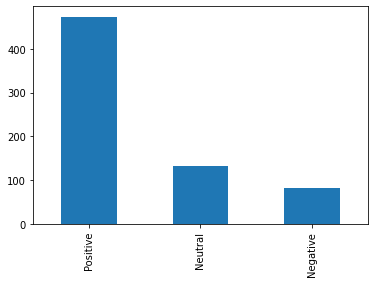

In [232]:
#see the balance between pos/neg

ML_clean['sentiment'].value_counts().plot.bar()
ML_clean['sentiment'].value_counts()

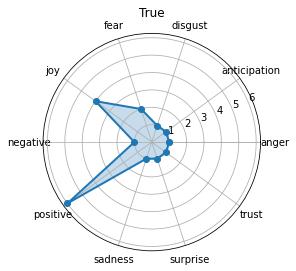

In [152]:
#lexicon chart

t = ML_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
ML_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

ML_tscore = ML_score.T 

#make rader chart

labels=np.array(emotion)
stats=ML_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(ML_tscore.iloc[0].all())
ax.grid(True)

In [233]:
March = M1_clean.sentiment.value_counts(normalize=True).to_frame()
March = March.rename(columns={'sentiment': 'March 1'}).T

M_L_df = ML_clean.sentiment.value_counts(normalize=True).to_frame()
M_L_df = M_L_df.rename(columns={'sentiment': 'March last'}).T
March = March.append(M_L_df)
March["Ranking"] = ["1","0"]
March

,Positive,Neutral,Negative,Ranking
March 1,0.616352,0.195667,0.187980,1
March last,0.689504,0.192420,0.118076,0


#April

In [154]:
df.loc[(df['date'].dt.month==4)&(df['date'].dt.year==2021)]
#2021-04-24

Ap = df.loc[(df.date == '2021-04-24')].iloc[[0,-1]]

Ap

#1 #Rapstar by Polo G 
# https://youtu.be/w2IhccXakkE

# 100 #Real As It Gets by Lil Baby featuring EST Gee
#https://youtu.be/yhoGtNiNX40

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
2800,2021-04-24,1,Rapstar,Polo G,NaN,1,1
2899,2021-04-24,100,Real As It Gets,Lil Baby Featuring EST Gee,83.0,34,6


##4_1

In [ ]:
##scraping

#1 #Rapstar by Polo G 
# https://youtu.be/w2IhccXakkE

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Rapstar=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/w2IhccXakkE") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Rapstar.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Rapstar_= pd.DataFrame(Rapstar, columns=['comment'])

Rapstar_.to_csv('/content/gdrive/My Drive/python files/final project/April1.csv', encoding='utf-8', index=False)

In [155]:
##cleaning data

April_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/April1.csv")
April_1.info()
April_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2800 non-null   object
dtypes: object(1)
memory usage: 22.5+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next\n4:05\nLil T...
1,"Official video for ""RAPSTAR"" by Polo G\n\nList..."
2,WE WENT #1
3,"This song is legendary, I'm glad to see that o..."
4,"""When they ask if you're ok it just makes ever..."


In [156]:
#drop duplicates and null values
April_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
April_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

April_1= April_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
April_1['comment'] = April_1['comment'].apply(str)
April_1['comment'] = April_1['comment'].str.lower()

#clear emojis

April_1['clean'] = preprocess(April_1['comment'])

#clean ios emojis
April_1['clean'] = [demoji.replace(x,"") for x in April_1.clean]

#clean languages other than english and add to dataset

April_1['language'] = 0

count = 0
for i in range(0,len(April_1)):

  temp = April_1['clean'].iloc[i]
  count += 1
  try:
    April_1['language'].iloc[i] = detect(temp)
  except:
    April_1['language'].iloc[i] = "error"

#detect and extract only english comments
April_1[April_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    2211
Name: language, dtype: int64

In [157]:
April_1 = April_1[April_1['language']=='en'].reset_index(drop=True)

A1_clean = pd.DataFrame(April_1, columns = ['clean'])

A1_clean.head()

,clean
0,"""when they ask if you're ok it just makes ever..."
1,just heard this song live on the new years bas...
2,"its been almost 1 year now, this song still on..."
3,"this man is the definition of we made it, all ..."
4,mr. polo g you are the epitome of what todays ...


In [158]:
A1_clean.count()

clean    2211
dtype: int64

In [159]:
#tokenize, remove stopwords and lemmatize

A1_clean['nostop'] = [remove_stopwords(x) for x in A1_clean.clean]

#find polarity

A1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in A1_clean.nostop]

A1_clean['sentiment'] = 0

A1_clean['sentiment'][A1_clean.polarity > 0] = "Positive"
A1_clean['sentiment'][A1_clean.polarity == 0] = "Neutral"
A1_clean['sentiment'][A1_clean.polarity < 0] = "Negative"
A1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"""when they ask if you're ok it just makes ever...",`` ask 're ok make everything seem worse '' hi...,-0.3182,Negative
1,just heard this song live on the new years bas...,heard song live new year bash tv wan na say so...,0.9022,Positive
2,"its been almost 1 year now, this song still on...",almost 1 year song still head polo g n't miss,0.1139,Positive
3,"this man is the definition of we made it, all ...",man definition made song hit another level,0.0000,Neutral
4,mr. polo g you are the epitome of what todays ...,mr. polo g epitome today mature extremely tale...,0.7501,Positive


Positive    982
Neutral     696
Negative    533
Name: sentiment, dtype: int64

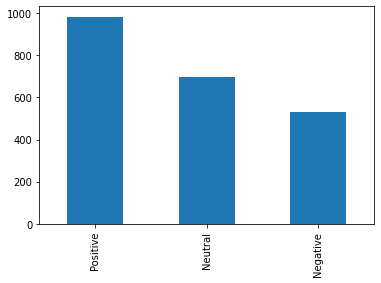

In [234]:
#see the balance between pos/neg

A1_clean['sentiment'].value_counts().plot.bar()
A1_clean['sentiment'].value_counts()

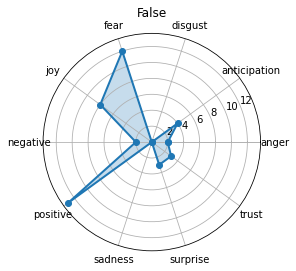

In [160]:
#lexicon chart

t = A1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
A1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

A1_tscore = A1_score.T 

#make rader chart

labels=np.array(emotion)
stats=A1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(A1_tscore.iloc[0].all())
ax.grid(True)

##4_100

In [ ]:
##scraping

# 100 #Real As It Gets by Lil Baby featuring EST Gee
#https://youtu.be/yhoGtNiNX40

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

RAIG=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/yhoGtNiNX40") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  RAIG.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
RAIG_= pd.DataFrame(RAIG, columns=['comment'])

RAIG_.to_csv('/content/gdrive/My Drive/python files/final project/April100.csv', encoding='utf-8', index=False)

In [161]:
##cleaning data

April_L = pd.read_csv("/content/gdrive/MyDrive/python files/final project/April100.csv")
April_L.info()
April_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1042 non-null   object
dtypes: object(1)
memory usage: 8.3+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n♪ GONE HAVE TO CHASE...
1,Watch the music video for Lil Baby Feat. EST G...
2,Hoping my neighbours like Lil Baby too 🔈
3,I don't understand how anyone could put a thum...
4,I love how lil baby knows every lyric of the f...


In [162]:
#drop duplicates and null values
April_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
April_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

April_L= April_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
April_L['comment'] = April_L['comment'].apply(str)
April_L['comment'] = April_L['comment'].str.lower()

#clear emojis

April_L['clean'] = preprocess(April_L['comment'])

#clean ios emojis
April_L['clean'] = [demoji.replace(x,"") for x in April_L.clean]

#clean languages other than english and add to dataset

April_L['language'] = 0

count = 0
for i in range(0,len(April_L)):

  temp = April_L['clean'].iloc[i]
  count += 1
  try:
    April_L['language'].iloc[i] = detect(temp)
  except:
    April_L['language'].iloc[i] = "error"

#detect and extract only english comments
April_L[April_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    815
Name: language, dtype: int64

In [163]:
April_L = April_L[April_L['language']=='en'].reset_index(drop=True)

AL_clean = pd.DataFrame(April_L, columns = ['clean'])

AL_clean.head()

,clean
0,hoping my neighbours like lil baby too
1,this song so good that i get pissed when they ...
2,if baby drops a another album the world is over
3,baby was feelin est gee verse more than he was...
4,arguably lil baby's hardest flow


In [164]:
AL_clean.count()

clean    815
dtype: int64

In [165]:
#tokenize, remove stopwords and lemmatize

AL_clean['nostop'] = [remove_stopwords(x) for x in AL_clean.clean]

#find polarity

AL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in AL_clean.nostop]

AL_clean['sentiment'] = 0

AL_clean['sentiment'][AL_clean.polarity > 0] = "Positive"
AL_clean['sentiment'][AL_clean.polarity == 0] = "Neutral"
AL_clean['sentiment'][AL_clean.polarity < 0] = "Negative"
AL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,hoping my neighbours like lil baby too,hoping neighbour like lil baby,0.6486,Positive
1,this song so good that i get pissed when they ...,song good get pissed stop music show behind scene,-0.5423,Negative
2,if baby drops a another album the world is over,baby drop another album world,-0.2732,Negative
3,baby was feelin est gee verse more than he was...,baby feelin est gee verse feelin verse,0.0000,Neutral
4,arguably lil baby's hardest flow,arguably lil baby 's hardest flow,-0.2500,Negative


Positive    344
Neutral     272
Negative    199
Name: sentiment, dtype: int64

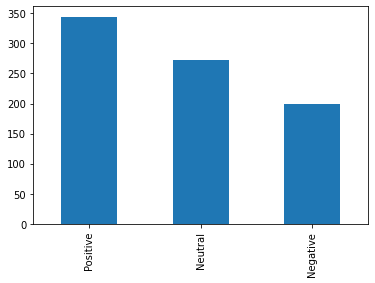

In [235]:
#see the balance between pos/neg

AL_clean['sentiment'].value_counts().plot.bar()
AL_clean['sentiment'].value_counts()

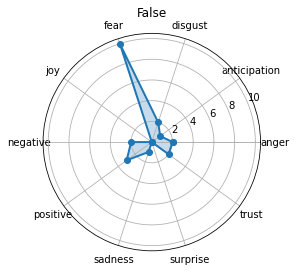

In [166]:
#lexicon chart

t = AL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
AL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

AL_tscore = AL_score.T 

#make rader chart

labels=np.array(emotion)
stats=AL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(AL_tscore.iloc[0].all())
ax.grid(True)

In [236]:
April = A1_clean.sentiment.value_counts(normalize=True).to_frame()
April = April.rename(columns={'sentiment': 'April 1'}).T

A_L_df = AL_clean.sentiment.value_counts(normalize=True).to_frame()
A_L_df = A_L_df.rename(columns={'sentiment': 'April last'}).T
April = April.append(A_L_df)
April["Ranking"] = ["1","0"]
April

,Positive,Neutral,Negative,Ranking
April 1,0.444143,0.314790,0.241067,1
April last,0.422086,0.333742,0.244172,0


#May

In [168]:
df.loc[(df['date'].dt.month==5)&(df['date'].dt.year==2021)]
#2021-05-29

M = df.loc[df.date == '2021-05-29'].iloc[[0,-2]]

M

#1 #Good 4 U by Olivia Rodrigo
#https://youtu.be/gNi_6U5Pm_o

#100 → no music video
#99 #Country Again by Thomas Rhett
#https://youtu.be/t_J2gGmoiOM

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
2300,2021-05-29,1,Good 4 U,Olivia Rodrigo,NaN,1,1
2398,2021-05-29,99,Country Again,Thomas Rhett,95.0,73,3


##5_1

In [ ]:
##scraping

#1 #Good 4 U by Olivia Rodrigo
#https://youtu.be/gNi_6U5Pm_o

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Good4U=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/gNi_6U5Pm_o") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Good4U.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Good4U_= pd.DataFrame(Good4U, columns=['comment'])

Good4U_.to_csv('/content/gdrive/My Drive/python files/final project/May1.csv', encoding='utf-8', index=False)

In [169]:
##cleaning data

May_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/May1.csv")
May_1.info()
May_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1947 non-null   object
dtypes: object(1)
memory usage: 15.4+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n59:20\nTaylor Swift ...
1,"Listen to ""good 4 u"" out now: https://OliviaRo..."
2,drivers license = sadness\ndeja vu = jealousy\...
3,Driver license - depression\n\nDeja Vu - envy\...
4,This is the most teenager song I've heard in y...


In [170]:
#drop duplicates and null values
May_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
May_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

May_1= May_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
May_1['comment'] = May_1['comment'].apply(str)
May_1['comment'] = May_1['comment'].str.lower()

#clear emojis

May_1['clean'] = preprocess(May_1['comment'])

#clean ios emojis
May_1['clean'] = [demoji.replace(x,"") for x in May_1.clean]

#clean languages other than english and add to dataset

May_1['language'] = 0

count = 0
for i in range(0,len(May_1)):

  temp = May_1['clean'].iloc[i]
  count += 1
  try:
    May_1['language'].iloc[i] = detect(temp)
  except:
    May_1['language'].iloc[i] = "error"

#detect and extract only english comments
May_1[May_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1431
Name: language, dtype: int64

In [171]:
May_1 = May_1[May_1['language']=='en'].reset_index(drop=True)

M1_clean = pd.DataFrame(May_1, columns = ['clean'])

M1_clean.head()

,clean
0,this is the most teenager song i've heard in y...
1,i really feel the state of frustration she tri...
2,listened to this on my plane flight into utah....
3,this whole album is going to be a no skip album
4,"""like a damn sociopath"" that might be the most..."


In [172]:
M1_clean.count()

clean    1431
dtype: int64

In [173]:
#tokenize, remove stopwords and lemmatize

M1_clean['nostop'] = [remove_stopwords(x) for x in M1_clean.clean]

#find polarity

M1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in M1_clean.nostop]

M1_clean['sentiment'] = 0

M1_clean['sentiment'][M1_clean.polarity > 0] = "Positive"
M1_clean['sentiment'][M1_clean.polarity == 0] = "Neutral"
M1_clean['sentiment'][M1_clean.polarity < 0] = "Negative"
M1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,this is the most teenager song i've heard in y...,teenager song 've heard year love drama feelin...,0.6486,Positive
1,i really feel the state of frustration she tri...,really feel state frustration tried show song aah,-0.5209,Negative
2,listened to this on my plane flight into utah....,listened plane flight utah top 100 playlist hi...,0.2023,Positive
3,this whole album is going to be a no skip album,whole album going skip album,0.0000,Neutral
4,"""like a damn sociopath"" that might be the most...",`` like damn sociopath '' might perfectly sung...,0.8957,Positive


Positive    882
Neutral     280
Negative    269
Name: sentiment, dtype: int64

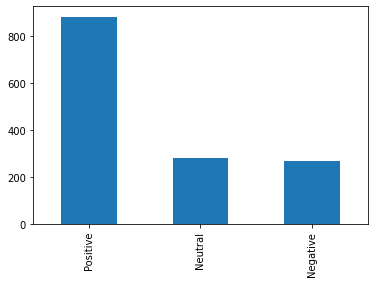

In [237]:
#see the balance between pos/neg

M1_clean['sentiment'].value_counts().plot.bar()
M1_clean['sentiment'].value_counts()

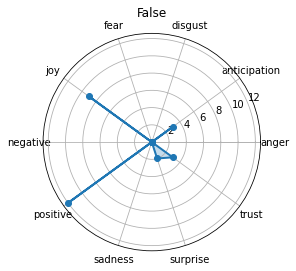

In [174]:
#lexicon chart

t = M1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
M1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

M1_tscore = M1_score.T 

#make rader chart

labels=np.array(emotion)
stats= M1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(M1_tscore.iloc[0].all())
ax.grid(True)

##5_99

In [ ]:
##scraping

#99 #Country Again by Thomas Rhett
#https://youtu.be/t_J2gGmoiOM

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Country_Again=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/t_J2gGmoiOM") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Country_Again.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Country_Again_= pd.DataFrame(Country_Again, columns=['comment'])

Country_Again_.to_csv('/content/gdrive/My Drive/python files/final project/May99.csv', encoding='utf-8', index=False)

In [175]:
##cleaning data

May_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/May99.csv")
May_L.info()
May_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  820 non-null    object
dtypes: object(1)
memory usage: 6.5+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nThis Duo Rocks!\nyou...
1,Official music video for the title track from ...
2,"Thanks for watching, y'all!"
3,I am not American but country music feels like...
4,Man it feels good to hear country again


In [176]:
#drop duplicates and null values
May_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
May_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

May_L= May_L.drop(labels=[0,1,2], axis=0).reset_index(drop=True)

#lowercase data
May_L['comment'] = May_L['comment'].apply(str)
May_L['comment'] = May_L['comment'].str.lower()

#clear emojis

May_L['clean'] = preprocess(May_L['comment'])

#clean ios emojis
May_L['clean'] = [demoji.replace(x,"") for x in May_L.clean]

#clean languages other than english and add to dataset

May_L['language'] = 0

count = 0
for i in range(0,len(May_L)):

  temp = May_L['clean'].iloc[i]
  count += 1
  try:
    May_L['language'].iloc[i] = detect(temp)
  except:
    May_L['language'].iloc[i] = "error"

#detect and extract only english comments
May_L[May_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    686
Name: language, dtype: int64

In [177]:
May_L = May_L[May_L['language']=='en'].reset_index(drop=True)

ML_clean = pd.DataFrame(May_L, columns = ['clean'])

ML_clean.head()

,clean
0,i am not american but country music feels like...
1,man it feels good to hear country again
2,good to see some people coming back to being c...
3,how many times has thomas rhett driven me to t...
4,no matter the gender or race or religion or co...


In [178]:
ML_clean.count()

clean    686
dtype: int64

In [179]:
#tokenize, remove stopwords and lemmatize

ML_clean['nostop'] = [remove_stopwords(x) for x in ML_clean.clean]

#find polarity

ML_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in ML_clean.nostop]

ML_clean['sentiment'] = 0

ML_clean['sentiment'][ML_clean.polarity > 0] = "Positive"
ML_clean['sentiment'][ML_clean.polarity == 0] = "Neutral"
ML_clean['sentiment'][ML_clean.polarity < 0] = "Negative"
ML_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,i am not american but country music feels like...,american country music feel like home gotten m...,0.2500,Positive
1,man it feels good to hear country again,man feel good hear country,0.4404,Positive
2,good to see some people coming back to being c...,good see people coming back country u never le...,0.9849,Positive
3,how many times has thomas rhett driven me to t...,many time thomas rhett driven tear point love ...,0.6369,Positive
4,no matter the gender or race or religion or co...,matter gender race religion color skin belief ...,0.4588,Positive


Positive    473
Neutral     132
Negative     81
Name: sentiment, dtype: int64

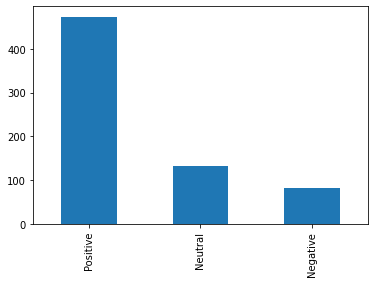

In [238]:
#see the balance between pos/neg

ML_clean['sentiment'].value_counts().plot.bar()
ML_clean['sentiment'].value_counts()

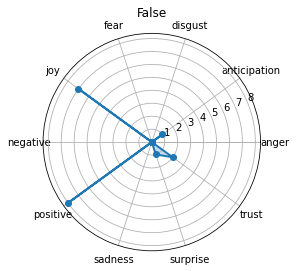

In [180]:
#lexicon chart

t = ML_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
ML_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

ML_tscore = ML_score.T 

#make rader chart

labels=np.array(emotion)
stats= ML_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(ML_tscore.iloc[0].all())
ax.grid(True)

In [239]:
May = M1_clean.sentiment.value_counts(normalize=True).to_frame()
May = May.rename(columns={'sentiment': 'May 1'}).T

M_L_df = ML_clean.sentiment.value_counts(normalize=True).to_frame()
M_L_df = M_L_df.rename(columns={'sentiment': 'May last'}).T
May = May.append(M_L_df)
May["Ranking"] = ["1","0"]
May

,Positive,Neutral,Negative,Ranking
May 1,0.616352,0.195667,0.187980,1
May last,0.689504,0.192420,0.118076,0


#June

In [182]:
df.loc[(df['date'].dt.month==6)&(df['date'].dt.year==2021)]
#2021-06-26

J = df.loc[(df.date == '2021-06-26')].iloc[[0,1,2,-1]]

J

#1 is no 1 song for june and july
#2 good 4 u was no 1 song last month

#3 Levitating by Dua Lipa featuring DaBaby
#https://youtu.be/TUVcZfQe-Kw

#100 #You by Regard x Troye Sivan x Tate McRae
#https://youtu.be/on_IPWtYdc0 

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
1900,2021-06-26,1,Butter,BTS,1.0,1,4
1901,2021-06-26,2,Good 4 U,Olivia Rodrigo,2.0,1,5
1902,2021-06-26,3,Levitating,Dua Lipa Featuring DaBaby,3.0,2,37
1999,2021-06-26,100,You,Regard x Troye Sivan x Tate McRae,NaN,100,1


##6_3

In [ ]:
##scraping

#3 Levitating by Dua Lipa featuring DaBaby
#https://youtu.be/TUVcZfQe-Kw

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Levitating=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/TUVcZfQe-Kw") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Levitating.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Levitating_ = pd.DataFrame(Levitating, columns=['comment'])

Levitating_.to_csv('/content/gdrive/My Drive/python files/final project/June3.csv', encoding='utf-8', index=False)

In [183]:
##cleaning data

June_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/June3.csv")
June_1.info()
June_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  3197 non-null   object
dtypes: object(1)
memory usage: 25.1+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next in 3\n3:45\n...
1,The official music video for Dua Lipa - Levita...
2,This song never gets boring what the hell
3,"Dua music brighten’s my day, she hasn’t had a ..."
4,Simplesmente linda!!!!


In [184]:
#drop duplicates and null values
June_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
June_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

June_1= June_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
June_1['comment'] = June_1['comment'].apply(str)
June_1['comment'] = June_1['comment'].str.lower()

#clear emojis

June_1['clean'] = preprocess(June_1['comment'])

#clean ios emojis
June_1['clean'] = [demoji.replace(x,"") for x in June_1.clean]

#clean languages other than english and add to dataset

June_1['language'] = 0

count = 0
for i in range(0,len(June_1)):

  temp = June_1['clean'].iloc[i]
  count += 1
  try:
    June_1['language'].iloc[i] = detect(temp)
  except:
    June_1['language'].iloc[i] = "error"

#detect and extract only english comments
June_1[June_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    2133
Name: language, dtype: int64

In [185]:
June_1 = June_1[June_1['language']=='en'].reset_index(drop=True)

J1_clean = pd.DataFrame(June_1, columns = ['clean'])

J1_clean.head()

,clean
0,"dua music brighten’s my day, she hasn’t had a ..."
1,this song is so incredibly good. i prefer the ...
2,i miss the days when this song would almost al...
3,"lyric\nif you wanna run away with me, i know a..."
4,that elevator is lit


In [186]:
J1_clean.count()

clean    2133
dtype: int64

In [187]:
#tokenize, remove stopwords and lemmatize

J1_clean['nostop'] = [remove_stopwords(x) for x in J1_clean.clean]

#find polarity

J1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in J1_clean.nostop]

J1_clean['sentiment'] = 0

J1_clean['sentiment'][J1_clean.polarity > 0] = "Positive"
J1_clean['sentiment'][J1_clean.polarity == 0] = "Neutral"
J1_clean['sentiment'][J1_clean.polarity < 0] = "Negative"
J1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"dua music brighten’s my day, she hasn’t had a ...",dua music brighten day bad song yet amazing en...,0.9545,Positive
1,this song is so incredibly good. i prefer the ...,song incredibly good prefer original version s...,0.5809,Positive
2,i miss the days when this song would almost al...,miss day song would almost always play radio,0.1335,Positive
3,"lyric\nif you wanna run away with me, i know a...",lyric wan na run away know galaxy take ride pr...,0.0000,Neutral
4,that elevator is lit,elevator lit,0.0000,Neutral


Positive    1284
Neutral      635
Negative     214
Name: sentiment, dtype: int64

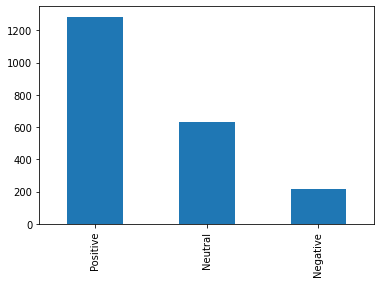

In [240]:
#see the balance between pos/neg

J1_clean['sentiment'].value_counts().plot.bar()
J1_clean['sentiment'].value_counts()

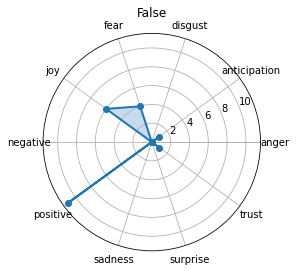

In [188]:
#lexicon chart

t = J1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
J1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

J1_tscore = J1_score.T 

#make rader chart

labels=np.array(emotion)
stats= J1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(J1_tscore.iloc[0].all())
ax.grid(True)

##6_100

In [ ]:
##scraping

#100 #You by Regard x Troye Sivan x Tate McRae
#https://youtu.be/on_IPWtYdc0 

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

You=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/on_IPWtYdc0 ") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  You.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
You_ = pd.DataFrame(You, columns=['comment'])

You_.to_csv('/content/gdrive/My Drive/python files/final project/June100.csv', encoding='utf-8', index=False)

In [189]:
##cleaning data

June_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/June100.csv")
June_L.info()
June_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1948 non-null   object
dtypes: object(1)
memory usage: 15.6+ KB


,comment
0,"SKIP NAVIGATION\nSIGN IN\n3:55\nRegard, Troye ..."
1,Listen to 'You' now: https://lnk.to/RegardTroy...
2,this is an absolute BOP how am I only discover...
3,"This song just screams, ""professional sound"". ..."
4,this song is my current fave song and I can't ...


In [190]:
#drop duplicates and null values
June_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
June_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

June_L= June_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
June_L['comment'] = June_L['comment'].apply(str)
June_L['comment'] = June_L['comment'].str.lower()

#clear emojis

June_L['clean'] = preprocess(June_L['comment'])

#clean ios emojis
June_L['clean'] = [demoji.replace(x,"") for x in June_L.clean]

#clean languages other than english and add to dataset

June_L['language'] = 0

count = 0
for i in range(0,len(June_L)):

  temp = June_L['clean'].iloc[i]
  count += 1
  try:
    June_L['language'].iloc[i] = detect(temp)
  except:
    June_L['language'].iloc[i] = "error"

#detect and extract only english comments
June_L[June_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1429
Name: language, dtype: int64

In [191]:
June_L = June_L[June_L['language']=='en'].reset_index(drop=True)

JL_clean = pd.DataFrame(June_L, columns = ['clean'])

JL_clean.head()

,clean
0,this is an absolute bop how am i only discover...
1,"this song just screams, ""professional sound"". ..."
2,this song is my current fave song and i can't ...
3,how the hell does this song only have 7 millio...
4,why is no one talking about how cool the conce...


In [192]:
JL_clean.count()

clean    1429
dtype: int64

In [193]:
#tokenize, remove stopwords and lemmatize

JL_clean['nostop'] = [remove_stopwords(x) for x in JL_clean.clean]

#find polarity

JL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in JL_clean.nostop]

JL_clean['sentiment'] = 0

JL_clean['sentiment'][JL_clean.polarity > 0] = "Positive"
JL_clean['sentiment'][JL_clean.polarity == 0] = "Neutral"
JL_clean['sentiment'][JL_clean.polarity < 0] = "Negative"
JL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,this is an absolute bop how am i only discover...,absolute bop discovering,0.0000,Neutral
1,"this song just screams, ""professional sound"". ...",song scream `` professional sound '' everythin...,0.1027,Positive
2,this song is my current fave song and i can't ...,song current fave song ca n't stop listening i...,0.7571,Positive
3,how the hell does this song only have 7 millio...,hell song 7 million view absolute bop,-0.6808,Negative
4,why is no one talking about how cool the conce...,one talking cool concept plot movie book genius,0.3182,Positive


Positive    863
Neutral     387
Negative    179
Name: sentiment, dtype: int64

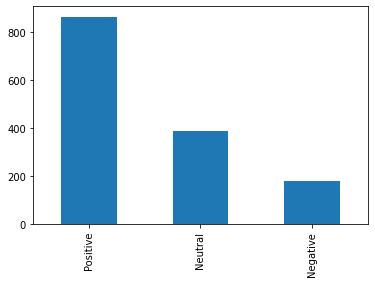

In [241]:
#see the balance between pos/neg

JL_clean['sentiment'].value_counts().plot.bar()
JL_clean['sentiment'].value_counts()

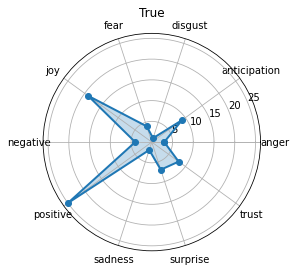

In [194]:
#lexicon chart

t = JL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
JL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

JL_tscore = JL_score.T 

#make rader chart

labels=np.array(emotion)
stats= JL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(JL_tscore.iloc[0].all())
ax.grid(True)

In [242]:
June = J1_clean.sentiment.value_counts(normalize=True).to_frame()
June = June.rename(columns={'sentiment': 'June 1'}).T

J_L_df = JL_clean.sentiment.value_counts(normalize=True).to_frame()
J_L_df = J_L_df.rename(columns={'sentiment': 'June last'}).T
June = June.append(J_L_df)
June["Ranking"] = ["1","0"]
June

,Positive,Neutral,Negative,Ranking
June 1,0.601969,0.297703,0.100328,1
June last,0.603919,0.270819,0.125262,0


#July

In [196]:
df.loc[(df['date'].dt.month==7)&(df['date'].dt.year==2021)]
#2021-07-31

Ju = df.loc[df.date == '2021-07-31'].iloc[[0,-1]]

Ju

#1

#100 #Cold Beer Calling My Name by Jameson Rodgers featuring Luke Combs
#https://youtu.be/bBBOw2ZLwqI

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
1400,2021-07-31,1,Butter,BTS,7.0,1,9
1499,2021-07-31,100,Cold Beer Calling My Name,Jameson Rodgers Featuring Luke Combs,95.0,95,3


##7_1

In [ ]:
##scraping ###NO 1 FOR TWO MONTHS IN A ROW

#1 #Butter by BTS
#https://youtu.be/WMweEpGlu_U

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Butter=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/WMweEpGlu_U") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Butter.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Butter_= pd.DataFrame(Butter, columns=['comment'])

Butter_.to_csv('/content/gdrive/My Drive/python files/final project/July1.csv', encoding='utf-8', index=False)

In [197]:
##cleaning data

July_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/July1.csv")
July_1.info()
July_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2941 entries, 0 to 2940
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2940 non-null   object
dtypes: object(1)
memory usage: 23.1+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next\n3:44\nBTS (...
1,NaN
2,BTS (방탄소년단) 'Butter' Official MV \n\n\nCredits...
3,الاغنية ادمانننننمن ارمييييي عرب نعيد نقول حطو...
4,"BTS songs are like Jin, They never gets old."


In [198]:
#drop duplicates and null values
July_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
July_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

July_1= July_1.drop(labels=[0,2], axis=0).reset_index(drop=True)

#lowercase data
July_1['comment'] = July_1['comment'].apply(str)
July_1['comment'] = July_1['comment'].str.lower()

#clear emojis

July_1['clean'] = preprocess(July_1['comment'])

#clean ios emojis
July_1['clean'] = [demoji.replace(x,"") for x in July_1.clean]

#clean languages other than english and add to dataset

July_1['language'] = 0

count = 0
for i in range(0,len(July_1)):

  temp = July_1['clean'].iloc[i]
  count += 1
  try:
    July_1['language'].iloc[i] = detect(temp)
  except:
    July_1['language'].iloc[i] = "error"

#detect and extract only english comments
July_1[July_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1060
Name: language, dtype: int64

In [199]:
July_1 = July_1[July_1['language']=='en'].reset_index(drop=True)

Ju1_clean = pd.DataFrame(July_1, columns = ['clean'])

Ju1_clean.head()

,clean
0,"bts songs are like jin, they never gets old."
1,for sure this song will hit 1 billion
2,let's appreciate the 1000% effort they always ...
3,"their charisma, choreography, vocals, angelic ..."
4,honest opinion: all of bts songs never get old


In [200]:
Ju1_clean.count()

clean    1060
dtype: int64

In [201]:
#tokenize, remove stopwords and lemmatize

Ju1_clean['nostop'] = [remove_stopwords(x) for x in Ju1_clean.clean]

#find polarity

Ju1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in Ju1_clean.nostop]

Ju1_clean['sentiment'] = 0

Ju1_clean['sentiment'][Ju1_clean.polarity > 0] = "Positive"
Ju1_clean['sentiment'][Ju1_clean.polarity == 0] = "Neutral"
Ju1_clean['sentiment'][Ju1_clean.polarity < 0] = "Negative"
Ju1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"bts songs are like jin, they never gets old.",bts song like jin never get old,0.3612,Positive
1,for sure this song will hit 1 billion,sure song hit 1 billion,0.3182,Positive
2,let's appreciate the 1000% effort they always ...,let 's appreciate 1000 % effort always put eve...,0.4019,Positive
3,"their charisma, choreography, vocals, angelic ...",charisma choreography vocal angelic voice ever...,0.0000,Neutral
4,honest opinion: all of bts songs never get old,honest opinion bts song never get old,0.5106,Positive


Positive    758
Neutral     212
Negative     90
Name: sentiment, dtype: int64

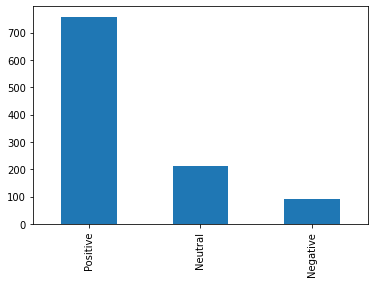

In [243]:
#see the balance between pos/neg

Ju1_clean['sentiment'].value_counts().plot.bar()
Ju1_clean['sentiment'].value_counts()

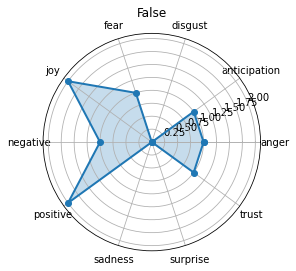

In [202]:
#lexicon chart

t = Ju1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
Ju1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

Ju1_tscore = Ju1_score.T 

#make rader chart

labels=np.array(emotion)
stats= Ju1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Ju1_tscore.iloc[0].all())
ax.grid(True)

##7_100

In [ ]:
##scraping

#100 #Cold Beer Calling My Name by Jameson Rodgers featuring Luke Combs
#https://youtu.be/bBBOw2ZLwqI

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

CBCMN=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/bBBOw2ZLwqI") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  CBCMN.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
CBCMN_= pd.DataFrame(CBCMN, columns=['comment'])

CBCMN_.to_csv('/content/gdrive/My Drive/python files/final project/July100.csv', encoding='utf-8', index=False)

In [203]:
##cleaning data

July_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/July100.csv")
July_L.info()
July_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  662 non-null    object
dtypes: object(1)
memory usage: 5.3+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n♪ Ain't nowhere to b...
1,"Listen to ""Cold Beer Calling My Name"" by James..."
2,Got together with the boys for the “Cold Beer ...
3,"Yes!! Love it!! Great job Luke, Jameson and ev..."
4,Thanks for checking out the video y'all! Hope...


In [204]:
#drop duplicates and null values
July_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
July_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

July_L= July_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
July_L['comment'] = July_L['comment'].apply(str)
July_L['comment'] = July_L['comment'].str.lower()

#clear emojis

July_L['clean'] = preprocess(July_L['comment'])

#clean ios emojis
July_L['clean'] = [demoji.replace(x,"") for x in July_L.clean]

#clean languages other than english and add to dataset

July_L['language'] = 0

count = 0
for i in range(0,len(July_L)):

  temp = July_L['clean'].iloc[i]
  count += 1
  try:
    July_L['language'].iloc[i] = detect(temp)
  except:
    July_L['language'].iloc[i] = "error"

#detect and extract only english comments
July_L[July_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    516
Name: language, dtype: int64

In [205]:
July_L = July_L[July_L['language']=='en'].reset_index(drop=True)

JuL_clean = pd.DataFrame(July_L, columns = ['clean'])

JuL_clean.head()

,clean
0,"yes!! love it!! great job luke, jameson and ev..."
1,thanks for checking out the video y'all! hope...
2,'bout to kick off the weekend!!
3,i can tell this summer is going to be great ju...
4,that moment when comb's voice chips in!


In [206]:
JuL_clean.count()

clean    516
dtype: int64

In [207]:
#tokenize, remove stopwords and lemmatize

JuL_clean['nostop'] = [remove_stopwords(x) for x in JuL_clean.clean]

#find polarity

JuL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in JuL_clean.nostop]

JuL_clean['sentiment'] = 0

JuL_clean['sentiment'][JuL_clean.polarity > 0] = "Positive"
JuL_clean['sentiment'][JuL_clean.polarity == 0] = "Neutral"
JuL_clean['sentiment'][JuL_clean.polarity < 0] = "Negative"
JuL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,"yes!! love it!! great job luke, jameson and ev...",yes love great job luke jameson everyone else ...,0.9493,Positive
1,thanks for checking out the video y'all! hope...,thanks checking video y'all hope dig,0.7003,Positive
2,'bout to kick off the weekend!!,'bout kick weekend,0.0000,Neutral
3,i can tell this summer is going to be great ju...,tell summer going great song,0.6249,Positive
4,that moment when comb's voice chips in!,moment comb 's voice chip,0.0000,Neutral


Positive    311
Neutral     136
Negative     69
Name: sentiment, dtype: int64

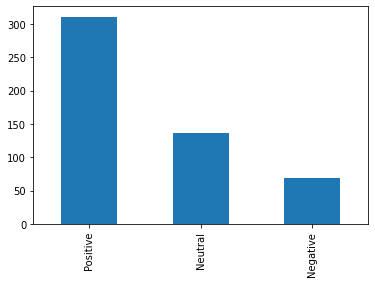

In [244]:
#see the balance between pos/neg

JuL_clean['sentiment'].value_counts().plot.bar()
JuL_clean['sentiment'].value_counts()

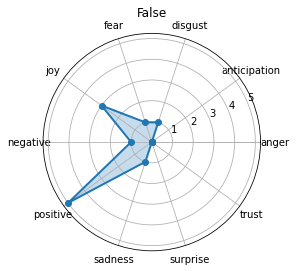

In [208]:
#lexicon chart

t = JuL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
JuL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

JuL_tscore = JuL_score.T 

#make rader chart

labels=np.array(emotion)
stats= JuL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(JuL_tscore.iloc[0].all())
ax.grid(True)

In [245]:
July = Ju1_clean.sentiment.value_counts(normalize=True).to_frame()
July = July.rename(columns={'sentiment': 'July 1'}).T

Ju_L_df = JuL_clean.sentiment.value_counts(normalize=True).to_frame()
Ju_L_df = Ju_L_df.rename(columns={'sentiment': 'July last'}).T
July = July.append(Ju_L_df)
July["Ranking"] = ["1","0"]
July

,Positive,Neutral,Negative,Ranking
July 1,0.715094,0.200000,0.084906,1
July last,0.602713,0.263566,0.133721,0


#August

In [210]:
df.loc[(df['date'].dt.month==8)&(df['date'].dt.year==2021)]
#2021-08-28

Aug = df.loc[df.date == '2021-08-28'].iloc[[0,-1]]

Aug

#1 #Stay by The Kid Laroi and JB
#https://youtu.be/kTJczUoc26U

#100 #5500 Degrees by EST Gee featuring Lil Baby etc...
#https://youtu.be/IWm4c9u0O8c

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
1000,2021-08-28,1,Stay,The Kid LAROI & Justin Bieber,1.0,1,6
1099,2021-08-28,100,5500 Degrees,"EST Gee Featuring Lil Baby, 42 Dugg & Rylo Rod...",NaN,92,2


##8_1

In [ ]:
##scraping

#1 #Stay by The Kid Laroi and JB
#https://youtu.be/kTJczUoc26U

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Stay=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/kTJczUoc26U") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Stay.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Stay_= pd.DataFrame(Stay, columns=['comment'])
Stay_.head()

Stay_.to_csv('/content/gdrive/My Drive/python files/final project/August1.csv', encoding='utf-8', index=False)

In [211]:
##cleaning data

August_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/August1.csv")
August_1.info()
August_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1625 non-null   object
dtypes: object(1)
memory usage: 13.0+ KB


,comment
0,TW\nSKIP NAVIGATION\nSIGN IN\n1:00:02\nThe Kid...
1,Official video for “Stay” by The Kid LAROI & J...
2,[Chorus: The Kid LAROI]\nI do the same thing I...
3,Both are artists who rose to fame at a young a...
4,Música maravilhosa


In [212]:
#drop duplicates and null values
August_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
August_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

August_1= August_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
August_1['comment'] = August_1['comment'].apply(str)
August_1['comment'] = August_1['comment'].str.lower()

#clear emojis

August_1['clean'] = preprocess(August_1['comment'])

#clean ios emojis
August_1['clean'] = [demoji.replace(x,"") for x in August_1.clean]

#clean languages other than english and add to dataset

August_1['language'] = 0

count = 0
for i in range(0,len(August_1)):

  temp = August_1['clean'].iloc[i]
  count += 1
  try:
    August_1['language'].iloc[i] = detect(temp)
  except:
    August_1['language'].iloc[i] = "error"

#detect and extract only english comments
August_1[August_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1129
Name: language, dtype: int64

In [213]:
August_1 = August_1[August_1['language']=='en'].reset_index(drop=True)

Au1_clean = pd.DataFrame(August_1, columns = ['clean'])

Au1_clean.head()

,clean
0,the background score in this song is legendary...
1,and five months later...still the badass song....
2,three words to describe this song. \n•addictiv...
3,lyrics\ni do the same thing i told you that i ...
4,i literally cannot get enough of this song!! i...


In [214]:
Au1_clean.count()

clean    1129
dtype: int64

In [247]:
#tokenize, remove stopwords and lemmatize

Au1_clean['nostop'] = [remove_stopwords(x) for x in Au1_clean.clean]

#find polarity

Au1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in Au1_clean.nostop]

Au1_clean['sentiment'] = 0

Au1_clean['sentiment'][Au1_clean.polarity > 0] = "Positive"
Au1_clean['sentiment'][Au1_clean.polarity == 0] = "Neutral"
Au1_clean['sentiment'][Au1_clean.polarity < 0] = "Negative"
Au1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,clean,nostop,polarity,sentiment
0,the background score in this song is legendary...,background score song legendary 's really hear...,0.5256,Positive
1,and five months later...still the badass song....,five month later ... still badass song respect,0.6705,Positive
2,three words to describe this song. \n•addictiv...,three word describe song •addictive •vibes •no...,0.0000,Neutral
3,lyrics\ni do the same thing i told you that i ...,lyric thing told never would told 'd change ev...,0.4404,Positive
4,i literally cannot get enough of this song!! i...,literally get enough song always put good mood,0.4404,Positive


Positive    697
Neutral     309
Negative    123
Name: sentiment, dtype: int64

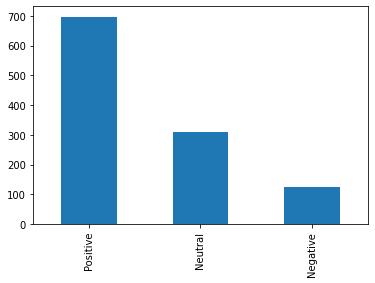

In [248]:
#see the balance between pos/neg

Au1_clean['sentiment'].value_counts().plot.bar()
Au1_clean['sentiment'].value_counts()

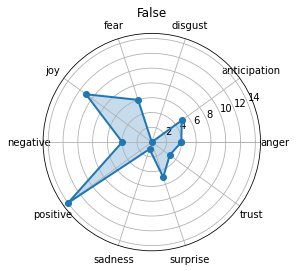

In [249]:
#lexicon chart

t = Au1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
Au1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

Au1_tscore = Au1_score.T 

#make rader chart

labels=np.array(emotion)
stats= Au1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Au1_tscore.iloc[0].all())
ax.grid(True)

##8_100

In [ ]:
##scraping

#100 #5500 Degrees by EST Gee featuring Lil Baby etc...
#https://youtu.be/IWm4c9u0O8c

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Degrees=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/IWm4c9u0O8c") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Degrees.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Degrees_= pd.DataFrame(Degrees, columns=['comment'])

Degrees_.to_csv('/content/gdrive/My Drive/python files/final project/August100.csv', encoding='utf-8', index=False)

In [217]:
##cleaning data

August_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/August100.csv")
August_L.info()
August_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2242 non-null   object
dtypes: object(1)
memory usage: 17.6+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n3:18\n42 Dugg - Mayb...
1,Listen to EST Gee's “Bigger Than Life Or Death...
2,When everyone do their part in a group project🔥
3,Now this how a XXL cypher supposed to go 🔥🔥🔥🔥
4,"Energy never disappoints with his beats, he de..."


In [218]:
#drop duplicates and null values
August_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
August_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

August_L= August_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
August_L['comment'] = August_L['comment'].apply(str)
August_L['comment'] = August_L['comment'].str.lower()

#clear emojis

August_L['clean'] = preprocess(August_L['comment'])

#clean ios emojis
August_L['clean'] = [demoji.replace(x,"") for x in August_L.clean]

#clean languages other than english and add to dataset

August_L['language'] = 0

count = 0
for i in range(0,len(August_L)):

  temp = August_L['clean'].iloc[i]
  count += 1
  try:
    August_L['language'].iloc[i] = detect(temp)
  except:
    August_L['language'].iloc[i] = "error"

#detect and extract only english comments
August_L[August_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1645
Name: language, dtype: int64

In [219]:
August_L = August_L[August_L['language']=='en'].reset_index(drop=True)

AuL_clean = pd.DataFrame(August_L, columns = ['clean'])

AuL_clean.head()

,clean
0,now this how a xxl cypher supposed to go
1,"energy never disappoints with his beats, he de..."
2,low key 42 dugg is one of the most underrated ...
3,"can’t lie,42dugg flows comes different in this..."
4,i love the way lil baby’s the pitch in his voi...


In [220]:
AuL_clean.count()

clean    1645
dtype: int64

In [221]:
#tokenize, remove stopwords and lemmatize

AuL_clean['nostop'] = [remove_stopwords(x) for x in AuL_clean.clean]

#find polarity

AuL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in AuL_clean.nostop]

AuL_clean['sentiment'] = 0

AuL_clean['sentiment'][AuL_clean.polarity > 0] = "Positive"
AuL_clean['sentiment'][AuL_clean.polarity == 0] = "Neutral"
AuL_clean['sentiment'][AuL_clean.polarity < 0] = "Negative"
AuL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,now this how a xxl cypher supposed to go,xxl cypher supposed go,0.0000,Neutral
1,"energy never disappoints with his beats, he de...",energy never disappoints beat definitely need ...,0.5612,Positive
2,low key 42 dugg is one of the most underrated ...,low key 42 dugg one underrated rapper,-0.2732,Negative
3,"can’t lie,42dugg flows comes different in this...","lie,42dugg flow come different song…",0.0000,Neutral
4,i love the way lil baby’s the pitch in his voi...,love way lil baby pitch voice went rap vocals.pf,0.6369,Positive


Neutral     714
Positive    480
Negative    451
Name: sentiment, dtype: int64

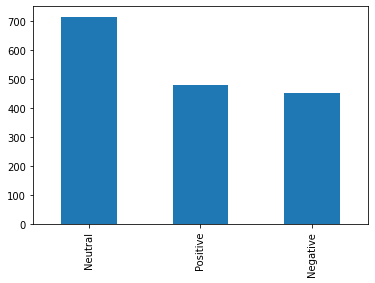

In [250]:
#see the balance between pos/neg

AuL_clean['sentiment'].value_counts().plot.bar()
AuL_clean['sentiment'].value_counts()

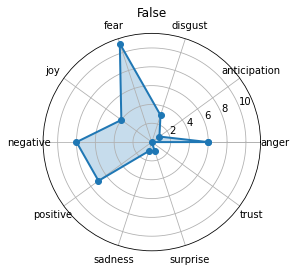

In [251]:
#lexicon chart

t = AuL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
AuL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

AuL_tscore = AuL_score.T 

#make rader chart

labels=np.array(emotion)
stats= AuL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(AuL_tscore.iloc[0].all())
ax.grid(True)

In [252]:
August = Au1_clean.sentiment.value_counts(normalize=True).to_frame()
August = August.rename(columns={'sentiment': 'August 1'}).T

Au_L_df = AuL_clean.sentiment.value_counts(normalize=True).to_frame()
Au_L_df = Au_L_df.rename(columns={'sentiment': 'August last'}).T
August = August.append(Au_L_df)
August["Ranking"] = ["1","0"]
August

,Positive,Neutral,Negative,Ranking
August 1,0.617360,0.273694,0.108946,1
August last,0.291793,0.434043,0.274164,0


#Septemer

In [253]:
df.loc[(df['date'].dt.month==9)&(df['date'].dt.year==2021)]
#2021-09-25

Sep = df.loc[df.date == "2021-09-25"].iloc[[0,1,2,-1]]

Sep

#1
#2 #no mv
#3 #bad habits by ed sheeran

#100 #Knowing You by Kenny Chesney 
#https://youtu.be/PkrTvtIxUaA

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
600,2021-09-25,1,Stay,The Kid LAROI & Justin Bieber,6.0,1,10
601,2021-09-25,2,Way 2 Sexy,Drake Featuring Future & Young Thug,1.0,1,2
602,2021-09-25,3,Bad Habits,Ed Sheeran,13.0,2,12
699,2021-09-25,100,Knowing You,Kenny Chesney,NaN,87,5


##9_3

In [ ]:
##scraping

#3 #bad habits by ed sheeran
#https://youtu.be/orJSJGHjBLI

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ed=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/orJSJGHjBLI") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  Ed.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
Ed_= pd.DataFrame(Ed, columns=['comment'])

Ed_.to_csv('/content/gdrive/My Drive/python files/final project/September3.csv', encoding='utf-8', index=False)

In [254]:
##cleaning data

September_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/September3.csv")
September_1.info()
September_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1666 non-null   object
dtypes: object(1)
memory usage: 13.2+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\nUp next\n3:58\nEd Sh...
1,The official video for Ed Sheeran - Bad Habits...
2,“The old Ed can’t come to the phone right now....
3,so much energy in this song
4,It's fantastic.


In [255]:
#drop duplicates and null values
September_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
September_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

September_1= September_1.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
September_1['comment'] = September_1['comment'].apply(str)
September_1['comment'] = September_1['comment'].str.lower()

#clear emojis

September_1['clean'] = preprocess(September_1['comment'])

#clean ios emojis
September_1['clean'] = [demoji.replace(x,"") for x in September_1.clean]

#clean languages other than english and add to dataset

September_1['language'] = 0

count = 0
for i in range(0,len(September_1)):

  temp = September_1['clean'].iloc[i]
  count += 1
  try:
    September_1['language'].iloc[i] = detect(temp)
  except:
    September_1['language'].iloc[i] = "error"

#detect and extract only english comments
September_1[September_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    1252
Name: language, dtype: int64

In [256]:
September_1 = September_1[September_1['language']=='en'].reset_index(drop=True)

S1_clean = pd.DataFrame(September_1, columns = ['clean'])

S1_clean.head()

,clean
0,“the old ed can’t come to the phone right now....
1,so much energy in this song
2,it's fantastic.
3,it's not a bad habit to make always good music...
4,i've loved your music when you started and wh...


In [257]:
S1_clean.count()

clean    1252
dtype: int64

In [258]:
#tokenize, remove stopwords and lemmatize

S1_clean['nostop'] = [remove_stopwords(x) for x in S1_clean.clean]

#find polarity

S1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in S1_clean.nostop]

S1_clean['sentiment'] = 0

S1_clean['sentiment'][S1_clean.polarity > 0] = "Positive"
S1_clean['sentiment'][S1_clean.polarity == 0] = "Neutral"
S1_clean['sentiment'][S1_clean.polarity < 0] = "Negative"
S1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,“the old ed can’t come to the phone right now....,“ old ed come phone right ... ... .. ”,0.0000,Neutral
1,so much energy in this song,much energy song,0.2732,Positive
2,it's fantastic.,'s fantastic,0.5574,Positive
3,it's not a bad habit to make always good music...,'s bad habit make always good music ed,-0.1531,Negative
4,i've loved your music when you started and wh...,'ve loved music started started collaborating ...,0.9788,Positive


Positive    832
Neutral     231
Negative    189
Name: sentiment, dtype: int64

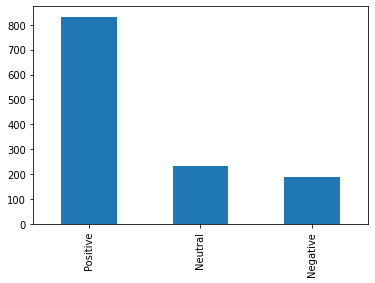

In [259]:
#see the balance between pos/neg

S1_clean['sentiment'].value_counts().plot.bar()
S1_clean['sentiment'].value_counts()

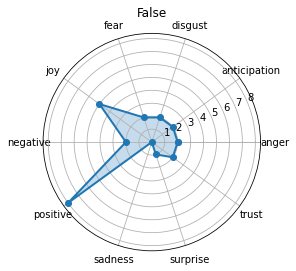

In [260]:
#lexicon chart

t = S1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
S1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

S1_tscore = S1_score.T 

#make rader chart

labels=np.array(emotion)
stats= S1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(S1_tscore.iloc[0].all())
ax.grid(True)

##9_100

In [ ]:
##scraping

#100 #Knowing You by Kenny Chesney 
#https://youtu.be/PkrTvtIxUaA

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

KnowingYou=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/PkrTvtIxUaA") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  KnowingYou.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
KnowingYou_= pd.DataFrame(KnowingYou, columns=['comment'])

KnowingYou_.to_csv('/content/gdrive/My Drive/python files/final project/September100.csv', encoding='utf-8', index=False)

In [261]:
##cleaning data

Sep_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/September100.csv")
Sep_L.info()
Sep_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  2281 non-null   object
dtypes: object(1)
memory usage: 18.3+ KB


,comment
0,SKIP NAVIGATION\nSIGN IN\n4:08\nKenny Chesney ...
1,Kenny Chesney - Knowing You (Official Music Vi...
2,I have terminal Cancer. My days are numbered. ...
3,There’s really only a handful of country music...
4,What a beautiful song. Perfectly describes the...


In [262]:
#drop duplicates and null values
Sep_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Sep_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Sep_L= Sep_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Sep_L['comment'] = Sep_L['comment'].apply(str)
Sep_L['comment'] = Sep_L['comment'].str.lower()

#clear emojis

Sep_L['clean'] = preprocess(Sep_L['comment'])

#clean ios emojis
Sep_L['clean'] = [demoji.replace(x,"") for x in Sep_L.clean]

#clean languages other than english and add to dataset

Sep_L['language'] = 0

count = 0
for i in range(0,len(Sep_L)):

  temp = Sep_L['clean'].iloc[i]
  count += 1
  try:
    Sep_L['language'].iloc[i] = detect(temp)
  except:
    Sep_L['language'].iloc[i] = "error"

#detect and extract only english comments
Sep_L[Sep_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    2006
Name: language, dtype: int64

In [263]:
Sep_L = Sep_L[Sep_L['language']=='en'].reset_index(drop=True)

SL_clean = pd.DataFrame(Sep_L, columns = ['clean'])

SL_clean.head()

,clean
0,i have terminal cancer. my days are numbered. ...
1,there’s really only a handful of country music...
2,what a beautiful song. perfectly describes the...
3,"i lost my wife in october, and kenny you just ..."
4,i lost my daughter a little over two months a...


In [264]:
SL_clean.count()

clean    2006
dtype: int64

In [265]:
#tokenize, remove stopwords and lemmatize

SL_clean['nostop'] = [remove_stopwords(x) for x in SL_clean.clean]

#find polarity

SL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in SL_clean.nostop]

SL_clean['sentiment'] = 0

SL_clean['sentiment'][SL_clean.polarity > 0] = "Positive"
SL_clean['sentiment'][SL_clean.polarity == 0] = "Neutral"
SL_clean['sentiment'][SL_clean.polarity < 0] = "Negative"
SL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,i have terminal cancer. my days are numbered. ...,terminal cancer day numbered soulmate love lif...,0.4215,Positive
1,there’s really only a handful of country music...,really handful country music artist around lon...,0.6249,Positive
2,what a beautiful song. perfectly describes the...,beautiful song perfectly describes feeling sad...,0.8807,Positive
3,"i lost my wife in october, and kenny you just ...",lost wife october kenny nailed,-0.3182,Negative
4,i lost my daughter a little over two months a...,lost daughter little two month ago battle leuk...,0.9653,Positive


Positive    1550
Negative     277
Neutral      179
Name: sentiment, dtype: int64

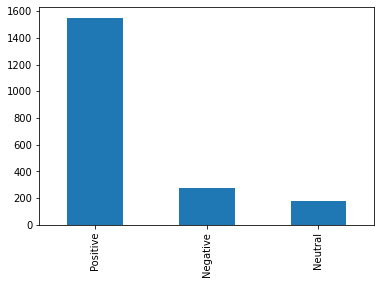

In [266]:
#see the balance between pos/neg

SL_clean['sentiment'].value_counts().plot.bar()
SL_clean['sentiment'].value_counts()

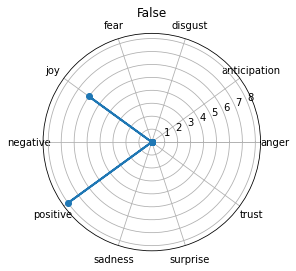

In [267]:
#lexicon chart

t = SL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
SL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

SL_tscore = SL_score.T 

#make rader chart

labels=np.array(emotion)
stats= SL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(SL_tscore.iloc[0].all())
ax.grid(True)

In [268]:
September = S1_clean.sentiment.value_counts(normalize=True).to_frame()
September = September.rename(columns={'sentiment': 'September 1'}).T

S_L_df = SL_clean.sentiment.value_counts(normalize=True).to_frame()
S_L_df = S_L_df.rename(columns={'sentiment': 'September last'}).T
September = September.append(S_L_df)
September["Ranking"] = ["1","0"]
September

,Positive,Neutral,Negative,Ranking
September 1,0.664537,0.184505,0.150958,1
September last,0.772682,0.089232,0.138086,0


#October

In [269]:
df.loc[(df['date'].dt.month==10)&(df['date'].dt.year==2021)]
#2021-10-30

Oct = df.loc[(df.date == '2021-10-30')].iloc[[0,-1]]

Oct

#1 #Easy On Me by Adele (peak rank: 1)
#https://youtu.be/U3ASj1L6_sY

#100 #Just About Over You by Priscilla Block (peak rank: 97)
#https://youtu.be/J1Jrp0tiRGk

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
100,2021-10-30,1,Easy On Me,Adele,68.0,1,2
199,2021-10-30,100,Just About Over You,Priscilla Block,97.0,97,2


##10_1

In [ ]:
##scraping

#1 #Easy On Me by Adele (peak rank: 1)
#https://youtu.be/U3ASj1L6_sY

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

EasyOnMe=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/U3ASj1L6_sY") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  EasyOnMe.append(comment.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
EasyOnMe_= pd.DataFrame(EasyOnMe, columns=['comment'])

EasyOnMe_.to_csv('/content/gdrive/My Drive/python files/final project/October1.csv', encoding='utf-8', index=False)

In [270]:
##cleaning data

Oct_1= pd.read_csv("/content/gdrive/MyDrive/python files/final project/October1.csv")
Oct_1.info()
Oct_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  1599 non-null   object
dtypes: object(1)
memory usage: 12.9+ KB


,comment
0,TW\nSKIP NAVIGATION\nSIGN IN\nSHOW CHAT REPLAY...
1,"Official Video for ""Easy On Me"" by Adele.\nSho..."
2,Lyrics\nThere ain't no gold in this river\n\nT...
3,love the song ️
4,"Essa música trás paz ao corpo, escuto de olhos..."


In [274]:
#drop duplicates and null values
Oct_1.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Oct_1.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Oct_1= Oct_1.drop(labels=[0,1,2], axis=0).reset_index(drop=True)

#lowercase data
Oct_1['comment'] = Oct_1['comment'].apply(str)
Oct_1['comment'] = Oct_1['comment'].str.lower()

#clear emojis

Oct_1['clean'] = preprocess(Oct_1['comment'])

#clean ios emojis
Oct_1['clean'] = [demoji.replace(x,"") for x in Oct_1.clean]

#clean languages other than english and add to dataset

Oct_1['language'] = 0

count = 0
for i in range(0,len(Oct_1)):

  temp = Oct_1['clean'].iloc[i]
  count += 1
  try:
    Oct_1['language'].iloc[i] = detect(temp)
  except:
    Oct_1['language'].iloc[i] = "error"

#detect and extract only english comments
Oct_1[Oct_1['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    993
Name: language, dtype: int64

In [275]:
Oct_1 = Oct_1[Oct_1['language']=='en'].reset_index(drop=True)

O1_clean = pd.DataFrame(Oct_1, columns = ['clean'])

O1_clean.head()

,clean
0,i love when the video fades into colour! it fe...
1,my best friend committed suicide two weeks ago...
2,"i was waiting for ages, finally .. a masterpie..."
3,the first time i heard this song i balled my e...
4,i'm almost 60 years old - every once in a grea...


In [276]:
O1_clean.count()

clean    993
dtype: int64

In [277]:
#tokenize, remove stopwords and lemmatize

O1_clean['nostop'] = [remove_stopwords(x) for x in O1_clean.clean]

#find polarity

O1_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in O1_clean.nostop]

O1_clean['sentiment'] = 0

O1_clean['sentiment'][O1_clean.polarity > 0] = "Positive"
O1_clean['sentiment'][O1_clean.polarity == 0] = "Neutral"
O1_clean['sentiment'][O1_clean.polarity < 0] = "Negative"
O1_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,i love when the video fades into colour! it fe...,love video fade colour felt like transformatio...,0.7717,Positive
1,my best friend committed suicide two weeks ago...,best friend committed suicide two week ago mom...,0.9083,Positive
2,"i was waiting for ages, finally .. a masterpie...",waiting age finally .. masterpiece,0.6249,Positive
3,the first time i heard this song i balled my e...,first time heard song balled eye every time we...,-0.7351,Negative
4,i'm almost 60 years old - every once in a grea...,'m almost 60 year old every great song hit raw...,0.6249,Positive


Positive    755
Neutral     158
Negative     80
Name: sentiment, dtype: int64

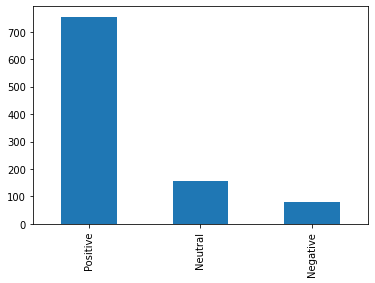

In [278]:
#see the balance between pos/neg

O1_clean['sentiment'].value_counts().plot.bar()
O1_clean['sentiment'].value_counts()

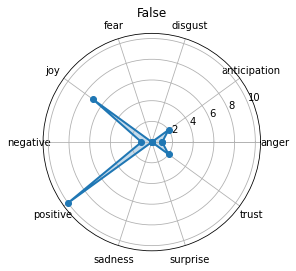

In [279]:
#lexicon chart

t = O1_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
O1_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

O1_tscore = O1_score.T 

#make rader chart

labels=np.array(emotion)
stats= O1_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(O1_tscore.iloc[0].all())
ax.grid(True)

##10_100

In [ ]:
##scraping

#100 #Just About Over You by Priscilla Block (peak rank: 97)
#https://youtu.be/J1Jrp0tiRGk

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

JAOY=[]

wait = WebDriverWait(wd,15)
wd.get("https://youtu.be/J1Jrp0tiRGk") 

for item in range(200): 
 wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END) 
 #time.sleep(15)

 #wait time so server doesnt think youre attacking it bc of continued requests

for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
  JAOY.append(comment.text)

In [ ]:
JAOY_= pd.DataFrame(JAOY, columns=['comment'])

JAOY_.to_csv('/content/gdrive/My Drive/python files/final project/October100.csv', encoding='utf-8', index=False)

In [280]:
##cleaning data

Oct_L= pd.read_csv("/content/gdrive/MyDrive/python files/final project/October100.csv")
Oct_L.info()
Oct_L.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  783 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,comment
0,"SKIP NAVIGATION\nSIGN IN\n♪ OH, I WAS JUST ABO..."
1,The Official Music Video for Priscilla Block’s...
2,i’m literally crying for you rn. this is liter...
3,I can't believe she used to be my old babysitt...
4,GIRL this song hits hard for me.it’s like ther...


In [281]:
#drop duplicates and null values
Oct_L.drop_duplicates(subset ="comment",keep = 'last', inplace = True)
Oct_L.dropna

#drop first few rows bc they are part of the music video description not comments
#reset index

Oct_L= Oct_L.drop(labels=[0,1], axis=0).reset_index(drop=True)

#lowercase data
Oct_L['comment'] = Oct_L['comment'].apply(str)
Oct_L['comment'] = Oct_L['comment'].str.lower()

#clear emojis

Oct_L['clean'] = preprocess(Oct_L['comment'])

#clean ios emojis
Oct_L['clean'] = [demoji.replace(x,"") for x in Oct_L.clean]

#clean languages other than english and add to dataset

Oct_L['language'] = 0

count = 0
for i in range(0,len(Oct_L)):

  temp = Oct_L['clean'].iloc[i]
  count += 1
  try:
    Oct_L['language'].iloc[i] = detect(temp)
  except:
    Oct_L['language'].iloc[i] = "error"

#detect and extract only english comments
Oct_L[Oct_L['language']=='en']['language'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


en    592
Name: language, dtype: int64

In [282]:
Oct_L = Oct_L[Oct_L['language']=='en'].reset_index(drop=True)

OL_clean = pd.DataFrame(Oct_L, columns = ['clean'])

OL_clean.head()

,clean
0,i’m literally crying for you rn. this is liter...
1,i can't believe she used to be my old babysitt...
2,girl this song hits hard for me.it’s like ther...
3,k but hear me out...luke combs and priscilla d...
4,i appreciate how cleanly priscilla sings this ...


In [283]:
OL_clean.count()

clean    592
dtype: int64

In [284]:
#tokenize, remove stopwords and lemmatize

OL_clean['nostop'] = [remove_stopwords(x) for x in OL_clean.clean]

#find polarity

OL_clean['polarity']=[analyzer.polarity_scores(x)['compound'] for x in OL_clean.nostop]

OL_clean['sentiment'] = 0

OL_clean['sentiment'][OL_clean.polarity > 0] = "Positive"
OL_clean['sentiment'][OL_clean.polarity == 0] = "Neutral"
OL_clean['sentiment'][OL_clean.polarity < 0] = "Negative"
OL_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,clean,nostop,polarity,sentiment
0,i’m literally crying for you rn. this is liter...,literally cry rn literally every girl song fin...,-0.1531,Negative
1,i can't believe she used to be my old babysitt...,ca n't believe used old babysitter congratulat...,0.5994,Positive
2,girl this song hits hard for me.it’s like ther...,girl song hit hard me.it like something always...,0.2732,Positive
3,k but hear me out...luke combs and priscilla d...,k hear ... luke comb priscilla mash hurricane,0.0000,Neutral
4,i appreciate how cleanly priscilla sings this ...,appreciate cleanly priscilla sings song clutte...,0.8834,Positive


Positive    407
Neutral     117
Negative     68
Name: sentiment, dtype: int64

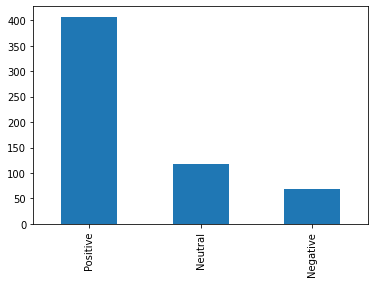

In [285]:
#see the balance between pos/neg

OL_clean['sentiment'].value_counts().plot.bar()
OL_clean['sentiment'].value_counts()

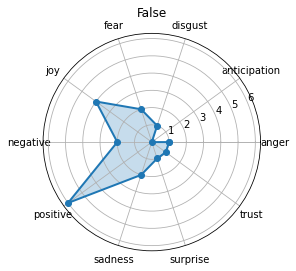

In [286]:
#lexicon chart

t = OL_clean.nostop

anger_ = 0
anticipation_ = 0
disgust_ = 0
fear_ = 0
joy_ = 0 
negative_ = 0
positive_ = 0 
sadness_ = 0 
surprise_ = 0 
trust_ = 0

for word in t:
  if word in anger:
    anger_ += 1
  if word in anticipation:
    anticipation_ += 1
  if word in disgust:
    disgust_ += 1
  if word in fear:
    fear_ += 1
  if word in joy:
    joy_ += 1
  if word in negative:
    negative_ += 1
  if word in positive:
    positive_ += 1
  if word in sadness:
    sadness_ += 1
  if word in surprise:
    surprise_ += 1
  if word in trust:
    trust_ += 1

emotion = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
      'positive', 'sadness', 'surprise', 'trust']
emoscore = [anger_, anticipation_, disgust_, fear_, joy_, negative_,
      positive_, sadness_, surprise_, trust_]
OL_score = pd.DataFrame(list(zip(emotion, emoscore)),
              columns =['Emotion', 'Score']).set_index('Emotion')

OL_tscore = OL_score.T 

#make rader chart

labels=np.array(emotion)
stats= OL_tscore.iloc[0].values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(OL_tscore.iloc[0].all())
ax.grid(True)

In [287]:
October = O1_clean.sentiment.value_counts(normalize=True).to_frame()
October = October.rename(columns={'sentiment': 'October 1'}).T

O_L_df = OL_clean.sentiment.value_counts(normalize=True).to_frame()
O_L_df = O_L_df.rename(columns={'sentiment': 'October last'}).T
October = October.append(S_L_df)
October["Ranking"] = ["1","0"]
October

,Positive,Neutral,Negative,Ranking
October 1,0.760322,0.159114,0.080564,1
September last,0.772682,0.089232,0.138086,0


In [288]:
all = pd.concat([November, December, January, February, March, April, May, June, July, August, September, October])

all

,Positive,Neutral,Negative,Ranking
November 1,0.548903,0.340249,0.110848,1
November last,0.391582,0.373468,0.234949,0
December 1,0.654051,0.255470,0.090479,1
December last,0.394897,0.363913,0.241191,0
January 1,0.601969,0.297703,0.100328,1
January last,0.603919,0.270819,0.125262,0
February 1,0.561874,0.235483,0.202643,1
February last,0.449859,0.269916,0.280225,0
March 1,0.616352,0.195667,0.187980,1
March last,0.689504,0.192420,0.118076,0


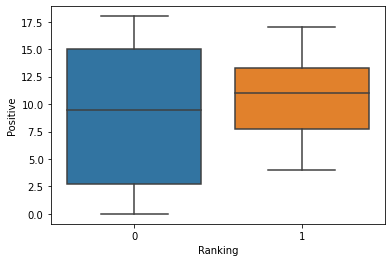

In [289]:
all['Positive']=all['Positive'].astype('category').cat.codes
all['Ranking']=all['Ranking'].astype('category').cat.codes

sns.boxplot(data = all , x ='Ranking',y='Positive')

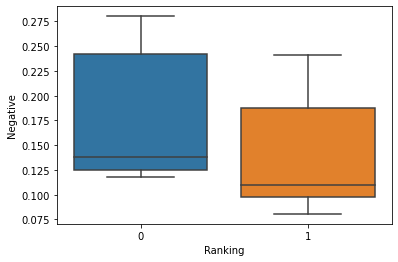

In [290]:
sns.boxplot(data = all , x ='Ranking',y='Negative')

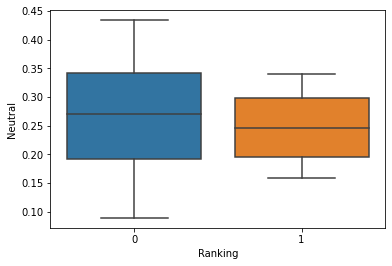

In [291]:
sns.boxplot(data = all , x ='Ranking',y='Neutral')